In [1]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Florida-Coral-Reef'
os.chdir(folder_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Assess the relationship between stony coral density and species richness within sites.


In [3]:
path = "dataset/"
merged = pd.DataFrame()
dens= pd.read_csv(path+'CREMP_SCOR_Summaries_2023_Density.csv')
sp = pd.read_csv(path+'CREMP_SCOR_RawData_2023.csv')
# dens = dens.add_prefix('dens_')
# merged = sp.merge(dens, left_on='SiteID', right_on='dens_SiteID', how='inner')
# merged.shape

In [4]:
density_cols = ['Acropora_cervicornis', 'Acropora_palmata',
                'Acropora_prolifera', 'Agaricia_fragilis',
                'Agaricia_lamarcki', 'Cladocora_arbuscula',
                'Colpophyllia_natans', 'Dendrogyra_cylindrus',
                'Dichocoenia_stokesii', 'Diploria_labyrinthiformis',
                'Eusmilia_fastigiata', 'Favia_fragum',
                'Helioseris_cucullata', 'Isophyllia_rigida',
                'Isophyllia_sinuosa', 'Madracis_aurentenra',
                'Madracis_decactis', 'Madracis_pharensis',
                'Madracis_scenaria', 'Madracis_sp',
                'Manicina_areolata', 'Oculina_robusta',
                'Meandrina_meandrites', 'Millepora_complanata',
                'Montastraea_cavernosa', 'Mussa_angulosa',
                'Mycetophyllia_aliciae', 'Mycetophyllia_danaana',
                'Mycetophyllia_ferox', 'Mycetophyllia_lamarckiana',
                'Mycetophyllia_sp', 'Oculina_diffusa',
                'Orbicella_annularis_complex', 'Orbicella_faveolata',
                'Orbicella_franksi', 'Phyllangia_americana',
                'Porites_astreoides', 'Porites_branneri',
                'Porites_porites', 'Pseudodiploria_clivosa',
                'Pseudodiploria_strigosa', 'Scleractinia',
                'Scolymia_cubensis', 'Scolymia_lacera',
                'Siderastrea_radians', 'Siderastrea_siderea',
                'Solenastrea_bournoni', 'Solenastrea_hyades',
                'Stephanocoenia_intersepta', 'Undaria_agaricites_complex']
columns = density_cols + ['SiteID' ,'Site_name']

In [ ]:
grouped_df_dens = dens[columns].groupby('Site_name').mean().reset_index()
grouped_df_sp = sp.groupby('Site_name')['SPP_CODE'].unique().explode().reset_index()

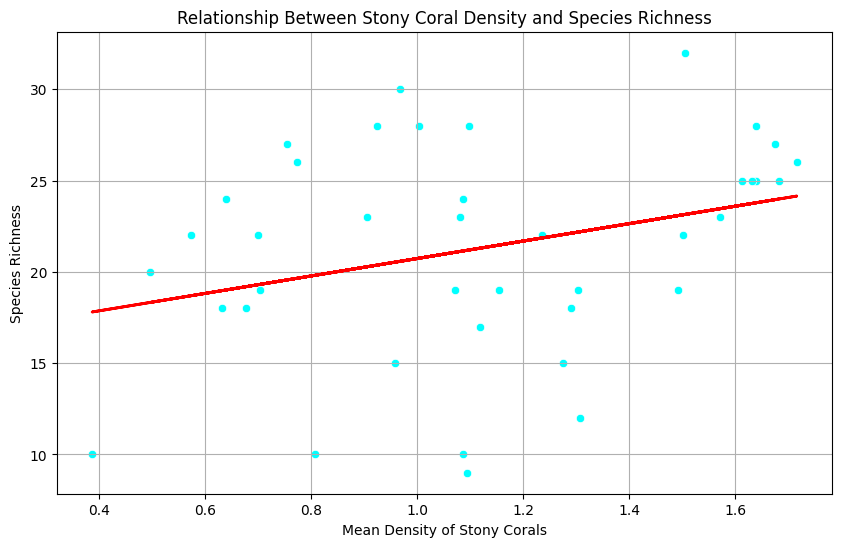

Regression Coefficient (Slope): 4.774925619061454
Intercept: 15.956189735178633
R-squared: 0.09442760977905884


In [ ]:
from sklearn.linear_model import LinearRegression

mean_density = grouped_df_dens.iloc[:, 1:].mean(axis=1)
grouped_df_dens['Mean_Density'] = mean_density

# Calculate species richness (number of unique species) for each site
species_richness = grouped_df_sp.groupby('Site_name')['SPP_CODE'].nunique()

# Merge the two datasets on Site_name
merged_data = grouped_df_dens[['Site_name', 'Mean_Density']].merge(
    species_richness.rename('Species_Richness'), on='Site_name'
)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Mean_Density', y='Species_Richness', color='cyan')

# Fit a linear regression model
X = merged_data['Mean_Density'].values.reshape(-1, 1)
y = merged_data['Species_Richness'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(merged_data['Mean_Density'], y_pred, color='red', linewidth=2)

# Customize plot
plt.title('Relationship Between Stony Coral Density and Species Richness')
plt.xlabel('Mean Density of Stony Corals')
plt.ylabel('Species Richness')
plt.grid(True)
plt.show()

# Print regression results
print("Regression Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

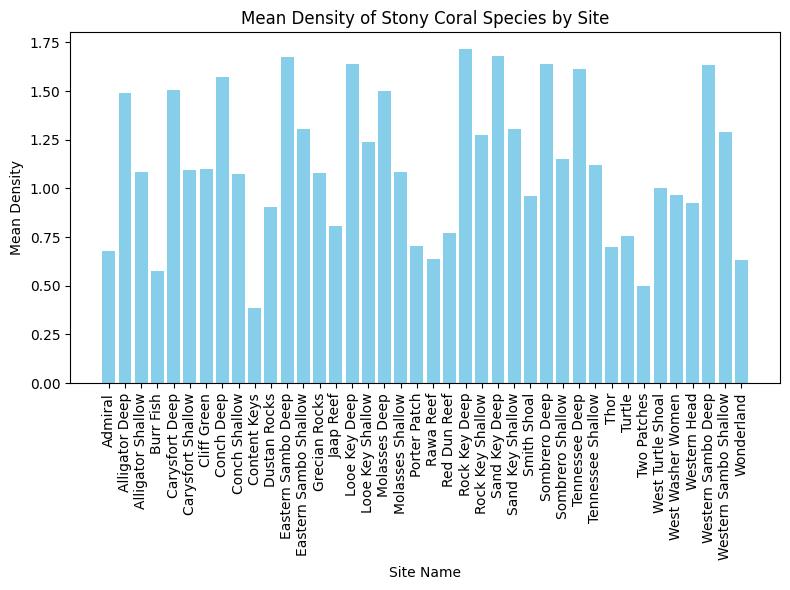

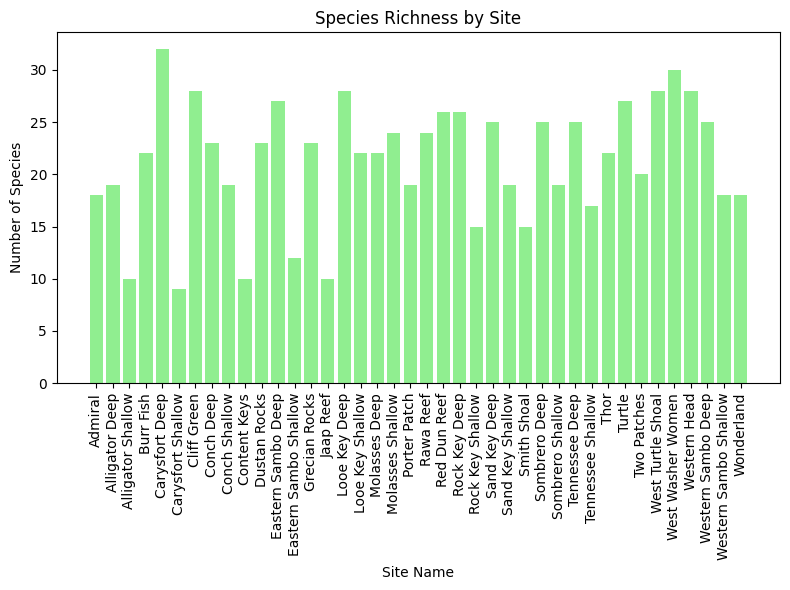

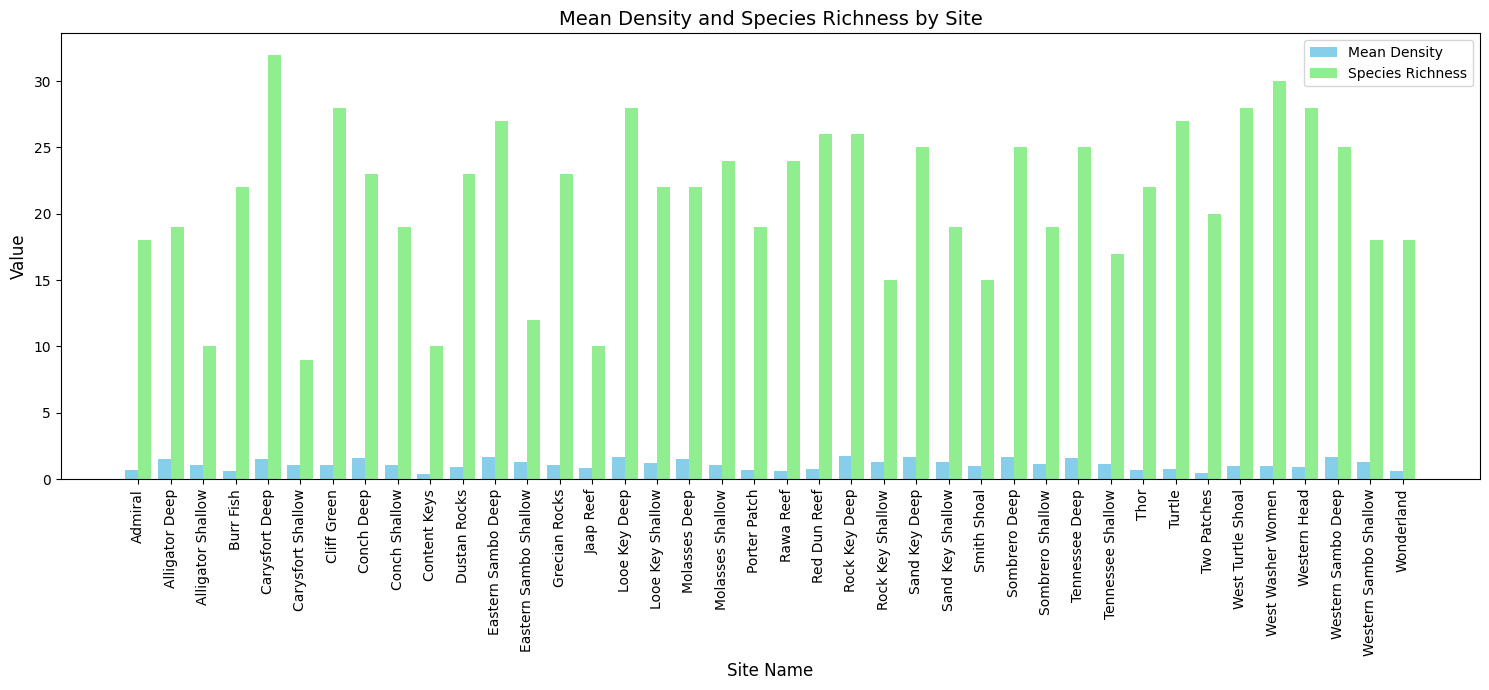

In [ ]:
grouped_df_dens['Mean_Density'] = grouped_df_dens.iloc[:, 1:].mean(axis=1)

# Calculate species richness (number of unique species) for each site
species_richness = grouped_df_sp.groupby('Site_name')['SPP_CODE'].nunique()

# Merge the two datasets on Site_name
merged_data = grouped_df_dens[['Site_name', 'Mean_Density']].merge(
    species_richness.rename('Species_Richness'), on='Site_name'
)

# Visualize Mean Density by Site
plt.figure(figsize=(8, 6))
plt.bar(merged_data['Site_name'], merged_data['Mean_Density'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Mean Density of Stony Coral Species by Site')
plt.xlabel('Site Name')
plt.ylabel('Mean Density')
plt.tight_layout()
plt.show()

# Visualize Species Richness by Site
plt.figure(figsize=(8, 6))
plt.bar(merged_data['Site_name'], merged_data['Species_Richness'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('Species Richness by Site')
plt.xlabel('Site Name')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(15, 7))

# Bar width
bar_width = 0.4

# Positions for the bars
density_positions = np.arange(len(merged_data['Site_name']))
richness_positions = density_positions + bar_width

# Create bars for Mean Density
ax.bar(
    density_positions,
    merged_data['Mean_Density'],
    width=bar_width,
    label='Mean Density',
    color='skyblue',
)

# Create bars for Species Richness
ax.bar(
    richness_positions,
    merged_data['Species_Richness'],
    width=bar_width,
    label='Species Richness',
    color='lightgreen',
)

# Customize the plot
ax.set_xlabel('Site Name', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Mean Density and Species Richness by Site', fontsize=14)
ax.set_xticks(density_positions + bar_width / 2)
ax.set_xticklabels(merged_data['Site_name'], rotation=90, fontsize=10)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

species types in each site

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt



# 1. Calculate species richness and total density
merged['species_richness'] = (merged[density_cols] > 0).sum(axis=1)
merged['total_density'] = merged[density_cols].sum(axis=1)

# 2. Aggregate by SiteID
site_data = merged.groupby('SiteID').agg({
    'species_richness': 'mean',
    'total_density': 'mean'
}).reset_index()

# 3. Correlation analysis
pearson_corr, pearson_p = stats.pearsonr(site_data['total_density'],
                                       site_data['species_richness'])
spearman_corr, spearman_p = stats.spearmanr(site_data['total_density'],
                                          site_data['species_richness'])

print(f"Pearson correlation: {pearson_corr:.2f} (p={pearson_p:.4f})")
print(f"Spearman correlation: {spearman_corr:.2f} (p={spearman_p:.4f})")

# 4. Regression analysis
X = sm.add_constant(site_data['total_density'])
y = site_data['species_richness']
model = sm.OLS(y, X).fit()
print(model.summary())

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(site_data['total_density'], site_data['species_richness'],
            alpha=0.6, edgecolor='k')
plt.plot(site_data['total_density'], model.predict(X),
         color='r', linestyle='--')
plt.xlabel('Total Coral Density (individuals/m²)')
plt.ylabel('Species Richness (count)')
plt.title('Species Richness vs. Coral Density')
plt.grid(True)
plt.show()


## Evaluate correlations between octocoral density, water temperature, and water temperature.

In [ ]:
path = "dataset/"
dens= pd.read_csv(path+'CREMP_OCTO_Summaries_2023_Density.csv')
temp = pd.read_csv(path+'CREMP_Temperatures_2023.csv')
# dens = dens.add_prefix('dens_')


In [ ]:
dens['Date'] = pd.to_datetime(dens['Date'], format='%m/%d/%Y')
dens['Month'] = dens['Date'].dt.month


In [ ]:
dens['Year'].unique()


array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [ ]:
temp['Year'].unique()


array([2020, 2021, 2022, 2023, 2024, 2003, 2004, 2005, 2006, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2018, 2002,
       2007])

In [ ]:
temp = temp[temp['Year'] >= 2011]
temp.shape


(4260270, 9)

In [ ]:
temp = temp.drop(columns=['Day','Time', 'OID_'])
temp = temp.drop_duplicates()
temp.shape

(761777, 6)

In [ ]:
dens.columns

Index(['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
       'StationID', 'Eunicea_calyculata', 'Gorgonia_ventalina',
       'Pseudopterogorgia_americana', 'Pseudopterogorgia_bipinnata',
       'Eunicea_flexuosa', 'Pseudoplexaura_porosa', 'Total_Octocorals',
       'Month'],
      dtype='object')

In [ ]:
temp


SiteID      Site_name  Year  Month  TempC  TempF
0            10    Rattlesnake  2020      6  29.59  85.26
1            10    Rattlesnake  2020      6  29.76  85.57
2            10    Rattlesnake  2020      6  29.81  85.66
3            10    Rattlesnake  2020      6  30.19  86.34
4            10    Rattlesnake  2020      6  30.34  86.61
...         ...            ...   ...    ...    ...    ...
5104995      81  Sand Key Deep  2024      2  21.74  71.14
5105007      81  Sand Key Deep  2024      2  22.36  72.26
5105009      81  Sand Key Deep  2024      2  22.25  72.05
5105010      81  Sand Key Deep  2024      2  22.22  72.00
5105011      81  Sand Key Deep  2024      2  22.34  72.22

[939309 rows x 6 columns]

In [ ]:
geog = pd.read_csv(path+'CREMP_Stations_2023.csv')
geog

OID_ Region Site_Code  SiteID      Site_name Habitat Subregion  \
0      29  FKNMS       9H1      10    Rattlesnake      HB        UK   
1      30  FKNMS       9H1      10    Rattlesnake      HB        UK   
2      31  FKNMS       9H1      10    Rattlesnake      HB        UK   
3      32  FKNMS       9H1      10    Rattlesnake      HB        UK   
4      33  FKNMS       9H2      11     El Radabob      HB        UK   
..    ...    ...       ...     ...            ...     ...       ...   
179   239  FKNMS       5D5      80  Rock Key Deep      OD        LK   
180   240  FKNMS       2D1      81  Sand Key Deep      OD        LK   
181   241  FKNMS       2D1      81  Sand Key Deep      OD        LK   
182   242  FKNMS       2D1      81  Sand Key Deep      OD        LK   
183   243  FKNMS       2D1      81  Sand Key Deep      OD        LK   

     StationID  First_Year_surveyed  length_m  Depth_ft    latDD    lonDD  \
0          101                 1996        23         6  25.1736 -80.3475   
1          102                 1996        22         6  25.1736 -80.3475   
2          103                 1996        23         6  25.1736 -80.3475   
3          104                 1996        25         6  25.1736 -80.3475   
4          111                 1996        22         9  25.1201 -80.3782   
..         ...                  ...       ...       ...      ...      ...   
179        804                 1996        21        40  24.4532 -81.8568   
180        811                 1996        22        35  24.4517 -81.8798   
181        812                 1996        22        34  24.4517 -81.8798   
182        813                 1996        22        33  24.4517 -81.8798   
183        814                 1996        22        30  24.4517 -81.8798   

     latDeg  latMin  lonDeg  lonMin  
0      25.0  10.416   -80.0  20.850  
1      25.0  10.416   -80.0  20.850  
2      25.0  10.416   -80.0  20.850  
3      25.0  10.416   -80.0  20.850  
4      25.0   7.206   -80.0  22.692  
..      ...     ...     ...     ...  
179    24.0  27.192   -81.0  51.408  
180    24.0  27.102   -81.0  52.788  
181    24.0  27.102   -81.0  52.788  
182    24.0  27.102   -81.0  52.788  
183    24.0  27.102   -81.0  52.788  

[184 rows x 17 columns]

In [ ]:
merged = pd.DataFrame()

In [ ]:
merged = temp.merge(dens, on=['SiteID', 'Month', 'Year'] )
merged

SiteID    Site_name_x  Year  Month  TempC  TempF       Date Subregion  \
0          26   Red Dun Reef  2015      8  31.48  88.67 2015-08-11        LK   
1          26   Red Dun Reef  2015      8  31.48  88.67 2015-08-11        LK   
2          26   Red Dun Reef  2015      8  31.48  88.67 2015-08-11        LK   
3          26   Red Dun Reef  2015      8  31.48  88.67 2015-08-11        LK   
4          26   Red Dun Reef  2015      8  31.40  88.53 2015-08-11        LK   
...       ...            ...   ...    ...    ...    ...        ...       ...   
98647      81  Sand Key Deep  2023      6  30.57  87.02 2023-06-08        LK   
98648      81  Sand Key Deep  2023      6  30.59  87.07 2023-06-08        LK   
98649      81  Sand Key Deep  2023      6  30.59  87.07 2023-06-08        LK   
98650      81  Sand Key Deep  2023      6  30.59  87.07 2023-06-08        LK   
98651      81  Sand Key Deep  2023      6  30.59  87.07 2023-06-08        LK   

      Habitat    Site_name_y  StationID  Eunicea_calyculata  \
0           P   Red Dun Reef        261                 0.4   
1           P   Red Dun Reef        262                 0.6   
2           P   Red Dun Reef        263                 0.9   
3           P   Red Dun Reef        264                 0.3   
4           P   Red Dun Reef        261                 0.4   
...       ...            ...        ...                 ...   
98647      OD  Sand Key Deep        814                 NaN   
98648      OD  Sand Key Deep        811                 NaN   
98649      OD  Sand Key Deep        812                 NaN   
98650      OD  Sand Key Deep        813                 NaN   
98651      OD  Sand Key Deep        814                 NaN   

       Gorgonia_ventalina  Pseudopterogorgia_americana  \
0                     1.4                          3.9   
1                     1.4                          2.4   
2                     1.3                          4.2   
3                     1.5                          1.4   
4                     1.4                          3.9   
...                   ...                          ...   
98647                 4.0                         11.6   
98648                 1.8                          7.8   
98649                 3.4                         10.4   
98650                 4.6                         16.9   
98651                 4.0                         11.6   

       Pseudopterogorgia_bipinnata  Eunicea_flexuosa  Pseudoplexaura_porosa  \
0                              0.0               1.3                    1.8   
1                              0.0               2.7                    2.9   
2                              0.0               1.4                    2.3   
3                              0.0               2.2                    2.4   
4                              0.0               1.3                    1.8   
...                            ...               ...                    ...   
98647                          1.1               0.7                    0.0   
98648                          0.7               0.7                    0.0   
98649                          1.0               0.7                    0.0   
98650                          0.4               1.2                    0.0   
98651                          1.1               0.7                    0.0   

       Total_Octocorals  
0                  15.7  
1                  15.4  
2                  16.9  
3                  10.1  
4                  15.7  
...                 ...  
98647              33.4  
98648              19.1  
98649              29.1  
98650              38.9  
98651              33.4  

[98652 rows x 18 columns]

In [ ]:
merged = merged.merge(geog, on =['StationID'])

In [ ]:
merged.shape

(98652, 34)

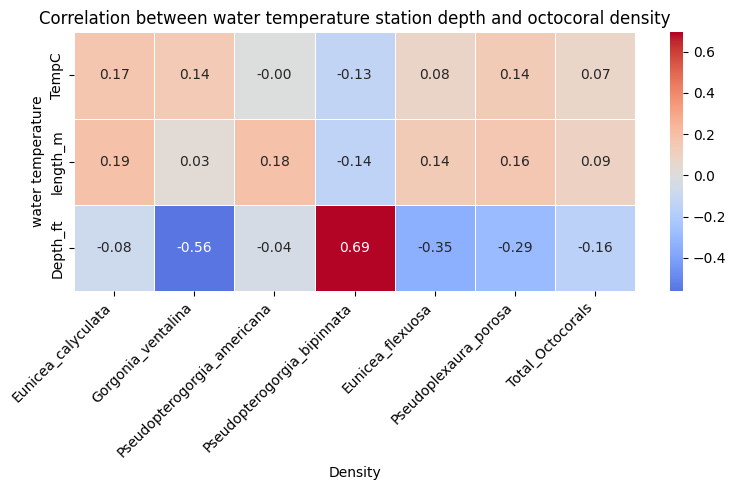

In [ ]:
merged_df = merged.groupby(['Depth_ft', 'TempC',  'length_m'] )[['Eunicea_calyculata',	'Gorgonia_ventalina',	'Pseudopterogorgia_americana',	'Pseudopterogorgia_bipinnata',
                        'Eunicea_flexuosa',	'Pseudoplexaura_porosa',	'Total_Octocorals']].mean()
merged_df = merged_df.reset_index()

corr_matrix = merged_df[['Eunicea_calyculata',	'Gorgonia_ventalina',	'Pseudopterogorgia_americana',	'Pseudopterogorgia_bipinnata',
                        'Eunicea_flexuosa',	'Pseudoplexaura_porosa',	'Total_Octocorals']].apply(
    lambda col: merged_df[['TempC', 'length_m',	'Depth_ft',	]].corrwith(col)
)
plt.figure(figsize=(8,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation between water temperature station depth and octocoral density')
plt.xlabel('Density')
plt.ylabel('water temperature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

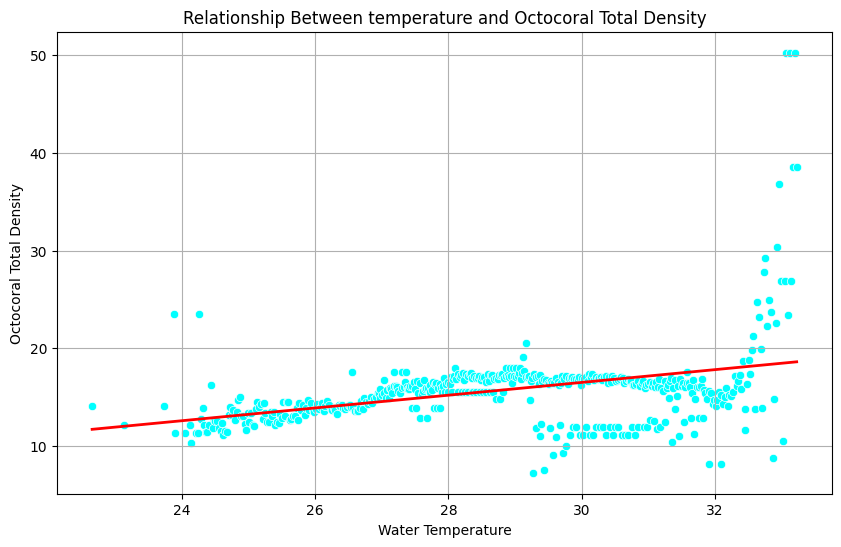

Regression Coefficient (Slope): 0.6529870247728939
Intercept: -3.0751713271444334
R-squared: 0.14005081714129675


In [ ]:
from sklearn.linear_model import LinearRegression

# Scatter plot with regression line
merged_df = merged.groupby('TempC')['Total_Octocorals'].mean()
merged_df = merged_df.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='TempC', y='Total_Octocorals', color='cyan')

merged_df.dropna(subset=['TempC', 'Total_Octocorals'], inplace=True)
# Fit a linear regression model
X = merged_df['TempC'].values.reshape(-1, 1)
y = merged_df['Total_Octocorals'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(merged_df['TempC'], y_pred, color='red', linewidth=2)

# Customize plot
plt.title('Relationship Between temperature and Octocoral Total Density')
plt.xlabel('Water Temperature')
plt.ylabel('Octocoral Total Density')
plt.grid(True)
plt.show()

# Print regression results
print("Regression Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

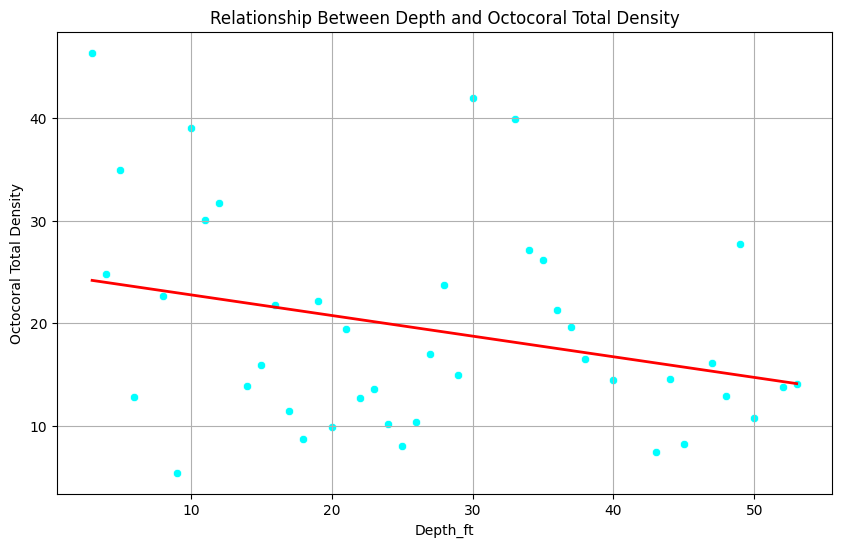

Regression Coefficient (Slope): -0.20120850617960567
Intercept: 24.77366395094699
R-squared: 0.08516836534080363


In [ ]:
from sklearn.linear_model import LinearRegression

# Scatter plot with regression line
merged_df = merged.groupby('Depth_ft')['Total_Octocorals'].mean()
merged_df = merged_df.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Depth_ft', y='Total_Octocorals', color='cyan')

merged_df.dropna(subset=['Depth_ft', 'Total_Octocorals'], inplace=True)
# Fit a linear regression model
X = merged_df['Depth_ft'].values.reshape(-1, 1)
y = merged_df['Total_Octocorals'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(merged_df['Depth_ft'], y_pred, color='red', linewidth=2)

# Customize plot
plt.title('Relationship Between Depth and Octocoral Total Density')
plt.xlabel('Depth_ft')
plt.ylabel('Octocoral Total Density')
plt.grid(True)
plt.show()

# Print regression results
print("Regression Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

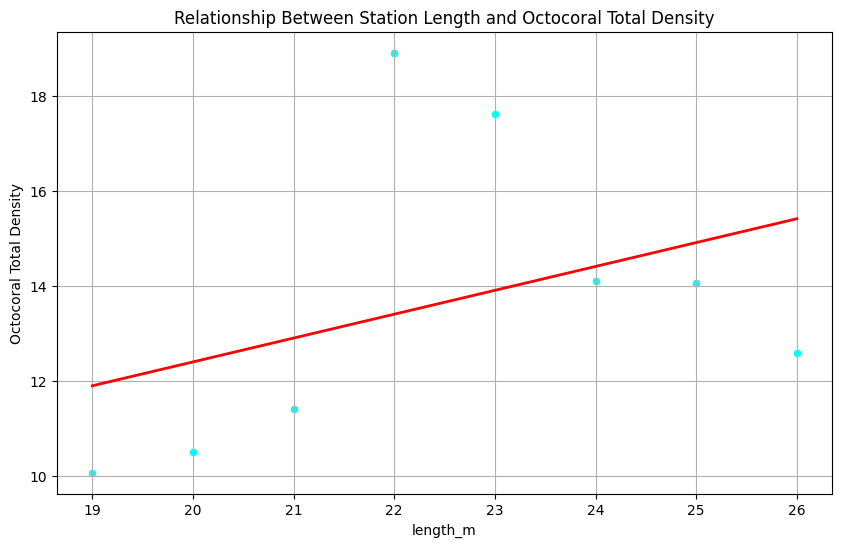

Regression Coefficient (Slope): 0.5024462371739284
Intercept: 2.3539690634089343
R-squared: 0.14596496941173043


In [ ]:
from sklearn.linear_model import LinearRegression

# Scatter plot with regression line
merged_df = merged.groupby('length_m')['Total_Octocorals'].mean()
merged_df = merged_df.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='length_m', y='Total_Octocorals', color='cyan')

merged_df.dropna(subset=['length_m', 'Total_Octocorals'], inplace=True)
# Fit a linear regression model
X = merged_df['length_m'].values.reshape(-1, 1)
y = merged_df['Total_Octocorals'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(merged_df['length_m'], y_pred, color='red', linewidth=2)

# Customize plot
plt.title('Relationship Between Station Length and Octocoral Total Density')
plt.xlabel('length_m')
plt.ylabel('Octocoral Total Density')
plt.grid(True)
plt.show()

# Print regression results
print("Regression Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

## Observe and analyze differences between stations in coral reef parameters—density, species composition, and percent cover—and how these parameters evolve over time.

In [6]:
path ='dataset/'
c=0
data_dict = {}
for full_name in os.listdir(path):
    if full_name.split(".")[-1]=='csv':
      name = full_name.split(".")[0]
      print(f'{c}- {full_name}')
      df = pd.read_csv(path+full_name)
      if 'Date' in df.columns and 'CREMP_Pcover_2023_StonyCoralSpecies' != name:
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
        df['Month'] = df['Date'].dt.month
      if 'CREMP_Pcover_2023_StonyCoralSpecies' == name:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month

      columns_to_prefix = [col for col in df.columns if col not in ['Year', 'Month', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]
      # Add prefix to specified columns
      tokens = name.split('_')
      if 'Stations' not in name and 'Temperatures' not in name:
        if tokens[-1] == '2023':
          prefix = tokens[1] + '_' + tokens[-2]+ '_'
        else:
          prefix = tokens[1] + '_' + tokens[-1] + '_'
      else:
        prefix = tokens[1] + '_'
      print(prefix)
      df = df.rename(columns={c: prefix + c for c in columns_to_prefix})
      if  ('Date' in df.columns) and  ('Subregion' in df.columns )and ('Habitat'  in df.columns) and ('Site_name' in df.columns) :
        df.drop(columns= ['Site_name','Date'], inplace = True )
      data_dict.update({name : df})
      c+=1

0- CREMP_OCTO_RawData_2023.csv
OCTO_RawData_
1- CREMP_OCTO_Summaries_2023_Density.csv
OCTO_Density_
2- CREMP_OCTO_Summaries_2023_MeanHeight.csv
OCTO_MeanHeight_
3- CREMP_Pcover_2023_TaxaGroups.csv
Pcover_TaxaGroups_
4- CREMP_SCOR_RawData_2023.csv
SCOR_RawData_
5- CREMP_SCOR_Summaries_2023_Counts.csv
SCOR_Counts_
6- CREMP_SCOR_Summaries_2023_Density.csv
SCOR_Density_
7- CREMP_SCOR_Summaries_2023_LTA.csv
SCOR_LTA_
8- CREMP_SCOR_Summaries_2023_ConditionCounts.csv
SCOR_ConditionCounts_
9- CREMP_Temperatures_2023.csv
Temperatures_
10- CREMP_Stations_2023.csv
Stations_
11- CREMP_Pcover_2023_StonyCoralSpecies.csv
Pcover_StonyCoralSpecies_


### SCOR

In [7]:
merged = data_dict['CREMP_SCOR_RawData_2023']
for name , df in data_dict.items():
  if (name != 'CREMP_SCOR_RawData_2023') and  ('SCOR' in name) or (name == 'CREMP_Pcover_2023_StonyCoralSpecies'):
    df.drop(columns=['Habitat', 'Subregion' ], inplace=True)
    merged = merged.merge(df, on=['SiteID', 'StationID', 'Month', 'Year',])
    print(name, df.shape, merged.shape)
merged


CREMP_SCOR_Summaries_2023_Counts (2037, 54) (136061, 65)
CREMP_SCOR_Summaries_2023_Density (2037, 54) (136061, 115)
CREMP_SCOR_Summaries_2023_LTA (2037, 54) (136061, 165)
CREMP_SCOR_Summaries_2023_ConditionCounts (15934, 19) (1244663, 180)
CREMP_Pcover_2023_StonyCoralSpecies (3918, 47) (1241926, 223)


Year Subregion Habitat  SiteID  StationID SCOR_RawData_SPP_CODE  \
0        2011        LK     BCP      18        181                  CARB   
1        2011        LK     BCP      18        181                  CARB   
2        2011        LK     BCP      18        181                  CARB   
3        2011        LK     BCP      18        181                  CARB   
4        2011        LK     BCP      18        181                  CARB   
...       ...       ...     ...     ...        ...                   ...   
1241921  2023        LK      OD      81        814                  SSID   
1241922  2023        LK      OD      81        814                  SSID   
1241923  2023        LK      OD      81        814                  SSID   
1241924  2023        LK      OD      81        814                  SSID   
1241925  2023        LK      OD      81        814                  SSID   

        SCOR_RawData_sciName  SCOR_RawData_Diameter_cm  \
0        Cladocora arbuscula                         6   
1        Cladocora arbuscula                         6   
2        Cladocora arbuscula                         6   
3        Cladocora arbuscula                         6   
4        Cladocora arbuscula                         9   
...                      ...                       ...   
1241921  Siderastrea siderea                        16   
1241922  Siderastrea siderea                        16   
1241923  Siderastrea siderea                        16   
1241924  Siderastrea siderea                        16   
1241925  Siderastrea siderea                        16   

         SCOR_RawData_Height_cm  SCOR_RawData_Percent_old_mortality  ...  \
0                             3                                 0.0  ...   
1                             3                                 0.0  ...   
2                             3                                 0.0  ...   
3                             3                                 0.0  ...   
4                             4                                 0.0  ...   
...                         ...                                 ...  ...   
1241921                       4                                 5.0  ...   
1241922                       4                                 5.0  ...   
1241923                       4                                 5.0  ...   
1241924                       4                                 5.0  ...   
1241925                       4                                 5.0  ...   

         Pcover_StonyCoralSpecies_Porites_porites_complex  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
1241921                                               0.0   
1241922                                               0.0   
1241923                                               0.0   
1241924                                               0.0   
1241925                                               0.0   

         Pcover_StonyCoralSpecies_Pseudodiploria_clivosa  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
1241921                                              0.0   
1241922                                              0.0   
1241923                                              0.0   
1241924                                              0.0   
1241925                                              0.0   

        Pcover_StonyCoralSpecies

In [8]:
data_dict['CREMP_Stations_2023'].drop(columns=['Stations_OID_', 'Stations_Region', 'Stations_Site_Code', 'Habitat',	'Subregion'], inplace=True)
data_dict['CREMP_Stations_2023']

SiteID      Site_name  StationID  Stations_First_Year_surveyed  \
0        10    Rattlesnake        101                          1996   
1        10    Rattlesnake        102                          1996   
2        10    Rattlesnake        103                          1996   
3        10    Rattlesnake        104                          1996   
4        11     El Radabob        111                          1996   
..      ...            ...        ...                           ...   
179      80  Rock Key Deep        804                          1996   
180      81  Sand Key Deep        811                          1996   
181      81  Sand Key Deep        812                          1996   
182      81  Sand Key Deep        813                          1996   
183      81  Sand Key Deep        814                          1996   

     Stations_length_m  Stations_Depth_ft  Stations_latDD  Stations_lonDD  \
0                   23                  6         25.1736        -80.3475   
1                   22                  6         25.1736        -80.3475   
2                   23                  6         25.1736        -80.3475   
3                   25                  6         25.1736        -80.3475   
4                   22                  9         25.1201        -80.3782   
..                 ...                ...             ...             ...   
179                 21                 40         24.4532        -81.8568   
180                 22                 35         24.4517        -81.8798   
181                 22                 34         24.4517        -81.8798   
182                 22                 33         24.4517        -81.8798   
183                 22                 30         24.4517        -81.8798   

     Stations_latDeg  Stations_latMin  Stations_lonDeg  Stations_lonMin  
0               25.0           10.416            -80.0           20.850  
1               25.0           10.416            -80.0           20.850  
2               25.0           10.416            -80.0           20.850  
3               25.0           10.416            -80.0           20.850  
4               25.0            7.206            -80.0           22.692  
..               ...              ...              ...              ...  
179             24.0           27.192            -81.0           51.408  
180             24.0           27.102            -81.0           52.788  
181             24.0           27.102            -81.0           52.788  
182             24.0           27.102            -81.0           52.788  
183             24.0           27.102            -81.0           52.788  

[184 rows x 12 columns]

In [9]:
merged = merged.merge(data_dict['CREMP_Stations_2023'], on=['SiteID', 'StationID'])


In [ ]:
merged.shape

(1241926, 233)

In [10]:
temp = pd.read_csv('dataset/CREMP_Temperatures_2023.csv')
temp.shape

(5105020, 9)

In [11]:
temp = temp[temp['Year'] >= 2011]
temp = temp.drop(columns=['Day','Time', 'OID_'])
temp = temp.drop_duplicates()
temp.shape

(761777, 6)

In [12]:
monthly_temp = temp.groupby(['SiteID', 'Site_name', 'Year' ,'Month'], as_index=False).agg({
    'TempC': 'mean',
    'TempF': 'mean'
})
monthly_temp.shape

(5880, 6)

In [13]:
merged = merged.merge(monthly_temp, on=['SiteID', 'Year', 'Month'], how='left')
merged.shape


(1241926, 236)

In [ ]:
merged.to_csv('merged_scor.csv', index=False)

In [3]:
merged = pd.read_csv('merged_scor.csv')

In [18]:
merged.columns

Index(['Year', 'Subregion', 'Habitat', 'SiteID', 'StationID',
       'SCOR_RawData_SPP_CODE', 'SCOR_RawData_sciName',
       'SCOR_RawData_Diameter_cm', 'SCOR_RawData_Height_cm',
       'SCOR_RawData_Percent_old_mortality',
       ...
       'Stations_latDD', 'Stations_lonDD', 'Stations_latDeg',
       'Stations_latMin', 'Stations_lonDeg', 'Stations_lonMin', 'Site_name_y',
       'TempC', 'TempF', 'season'],
      dtype='object', length=237)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots

# Set the aesthetic style of the plots
# plt.style.use('seaborn-whitegrid')
# sns.set_palette("viridis")

# Basic information about the dataset
print(f"Dataset Shape: {merged.shape}")
print(f"Number of unique stations: {merged['StationID'].nunique()}")
print(f"Year range: {merged['Year'].min()} to {merged['Year'].max()}")

# Define column categories as provided
density_cols = [col for col in merged.columns if 'Density' in col]
cover_cols = [col for col in merged.columns if 'Pcover' in col or 'percent' in col.lower()]
cover_cols.remove('Pcover_StonyCoralSpecies_Surveyed_all_years')
cover_cols.remove( 'Pcover_StonyCoralSpecies_OID_')
species_cols = [col for col in merged.columns if 'SPP' in col]
LTA_cols = [col for col in merged.columns if 'LTA' in col]
condition_counts_cols = [col for col in merged.columns if 'ConditionCounts' in col]

# Check for missing values
missing_values = merged.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Create a year-station dataframe for temporal analysis
year_station_df = merged.groupby(['Year', 'StationID']).size().reset_index(name='count')

# Convert data types where necessary
merged['Year'] = pd.to_numeric(merged['Year'], errors='coerce')


Dataset Shape: (1241926, 236)
Number of unique stations: 160
Year range: 2011 to 2023
Columns with missing values:
SCOR_RawData_Percent_old_mortality          421
SCOR_RawData_Percent_recent_mortality       356
SCOR_RawData_Tissue_isolates              13789
SCOR_RawData_Conditions                  908950
SCOR_RawData_LTA_cm2                        421
SCOR_Counts_Orbicella_faveolata          197147
SCOR_Counts_Orbicella_franksi            197147
SCOR_Density_Orbicella_faveolata         196067
SCOR_Density_Orbicella_franksi           196067
SCOR_LTA_Orbicella_faveolata             197147
SCOR_LTA_Orbicella_franksi               197147
Site_name_y                              125401
TempC                                    125401
TempF                                    125401
dtype: int64


### Spatial analysis

In [6]:
def analyze_spatial_patterns(data, station_col, cover_cols, density_cols):
    """Cluster stations based on similar coral parameters"""
    # Aggregate data by station
    station_data = data.groupby(station_col)[cover_cols + density_cols].mean().reset_index()

    # Standardize features for clustering
    features = station_data[cover_cols + density_cols]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Find optimal number of clusters using silhouette score
    silhouette_scores = []
    k_range = range(2, len(station_data))

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features_scaled)
        silhouette_scores.append(silhouette_score(features_scaled, labels))

    # Apply K-means with optimal number of clusters
    optimal_k = k_range[np.argmax(silhouette_scores)]
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    station_data['cluster'] = kmeans.fit_predict(features_scaled)

    # Create geographic visualization if coordinates available
    if 'Stations_latDD' in data.columns and 'Stations_lonDD' in data.columns:
        # print(1)
        # Merge cluster assignments with coordinates
        station_coords = data.groupby(station_col)[['Stations_latDD', 'Stations_lonDD']].mean()
        station_clusters = pd.merge(station_data, station_coords, on=station_col)

        # Create interactive map
        m = folium.Map(location=[station_clusters['Stations_latDD'].mean(),
                                station_clusters['Stations_lonDD'].mean()],
                      zoom_start=8)
        # print(2)

        # Add station markers with cluster information
        for _, row in station_clusters.iterrows():
            popup_text = f"""
            <b>Station:</b> {row[station_col]}<br>
            <b>Cluster:</b> {row['cluster']}<br>
            """
            folium.Marker(
                location=[row['Stations_latDD'], row['Stations_lonDD']],
                popup=folium.Popup(popup_text, max_width=300),
                icon=folium.Icon(color=['blue', 'red', 'green', 'purple', 'orange'][int(row['cluster']) % 5])
            ).add_to(m)
        print(1)
        m.save('/content/drive/MyDrive/Florida-Coral-Reef/station_clusters_map.html')

    return station_data, optimal_k


merged['season'] = merged['Month'].apply(
            lambda x: 'Winter' if x in [12, 1, 2] else
                      'Spring' if x in [3, 4, 5] else
                      'Summer' if x in [6, 7, 8] else 'Fall')
density_cols = [col for col in merged.columns if 'Density' in col.lower()]
cover_cols = [col for col in merged.columns if 'Pcover' in col.lower() or 'percent' in col.lower()]
species_cols = [col for col in merged.columns if 'SPP' in col.lower() ]
station_clusters, optimal_k = analyze_spatial_patterns(merged, 'StationID', cover_cols, density_cols)

1


In [ ]:
station_clusters['cluster']

0      0
1      1
2      1
3      1
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Name: cluster, Length: 160, dtype: int32

In [9]:
merged['SCOR_RawData_sciName'].nunique()

50

In [21]:
def compare_stations_spatially(data, year=None, parameters=['density', 'cover', 'richness', 'lta']):
    """
    Compare stations spatially using maps and comparative visualizations.
    Parameters:
        data: DataFrame containing coral data
        year: Specific year to analyze (None for most recent)
        parameters: List of parameters to compare
    """
    # If year is not specified, use the most recent year
    if year is None:
        year = data['Year'].max()

    year_data = data[data['Year'] == year]
    stations = year_data['StationID'].unique()
    # Prepare a summary dataframe for each station
    station_summary = []

    for station in stations:
        station_data = year_data[year_data['StationID'] == station]
        station_data['Stations_latDD'].unique()

        # Extract location information
        try:
            lat = station_data['Stations_latDD'].iloc[0]
            lon = station_data['Stations_lonDD'].iloc[0]
            site_name = station_data['Site_name_y'].iloc[0]
        except (KeyError, IndexError):
            # If coordinates aren't available, skip this station
            continue

        summary = {
            'StationID': station,
            'Latitude': lat,
            'Longitude': lon,
            'SiteName': site_name
        }

        # Calculate metrics based on requested parameters
        if 'density' in parameters:
            total_density = station_data[density_cols].sum().sum()
            summary['TotalDensity'] = total_density

        if 'cover' in parameters:
            species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]
            total_cover = station_data[species_cover_cols].sum().sum()
            summary['TotalCover'] = total_cover

        if 'richness' in parameters:
            species_richness = station_data['SCOR_RawData_sciName'].nunique()
            summary['SpeciesRichness'] = species_richness

        if 'lta' in parameters:
            total_lta = station_data[LTA_cols].sum().sum()
            summary['TotalLTA'] = total_lta
        station_summary.append(summary)

    station_df = pd.DataFrame(station_summary)

    # Create maps for spatial visualization
    fig = px.scatter_mapbox(
        station_df,
        lat="Latitude",
        lon="Longitude",
        hover_name="SiteName",
        hover_data={
            "StationID": True,
            "TotalDensity": 'density' in parameters,
            "TotalCover": 'cover' in parameters,
            "SpeciesRichness": 'richness' in parameters,
            "TotalLTA": 'lta' in parameters,
            "Latitude": False,
            "Longitude": False
        },
        color="TotalCover" if 'cover' in parameters else "TotalDensity",
        size="SpeciesRichness" if 'richness' in parameters else "TotalDensity",
        color_continuous_scale=px.colors.sequential.Viridis,
        size_max=15,
        zoom=8,
        title=f'Spatial Distribution of Coral Reef Parameters in {year}'
    )

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

    # Save as HTML for interactive viewing
    fig.write_html(f'scor_spatial_comparison_{year}.html')
    fig.show()

    # Create comparative bar charts
    if len(station_df) > 0:
        # Sort stations by one of the metrics
        if 'cover' in parameters:
            station_df = station_df.sort_values('TotalCover', ascending=False).head(15)
        elif 'density' in parameters:
            station_df = station_df.sort_values('TotalDensity', ascending=False).head(15)
        else:
            station_df = station_df.sort_values('SpeciesRichness', ascending=False).head(15)

        # Create subplots for different metrics
        fig = make_subplots(
            rows=len(parameters),
            cols=1,
            subplot_titles=[p.capitalize() for p in parameters],
            vertical_spacing=0.1
        )

        for i, param in enumerate(parameters):
            if param == 'density' and 'TotalDensity' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalDensity'],
                    name='Total Density',
                    marker_color='royalblue'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'cover' and 'TotalCover' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalCover'],
                    name='Total Cover (%)',
                    marker_color='forestgreen'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'richness' and 'SpeciesRichness' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['SpeciesRichness'],
                    name='Species Richness',
                    marker_color='darkgoldenrod'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'lta' and 'TotalLTA' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalLTA'],
                    name='Total LTA (cm²)',
                    marker_color='firebrick'
                )
                fig.add_trace(bar, row=i+1, col=1)

        fig.update_layout(
            height=300 * len(parameters),
            width=900,
            title_text=f'Comparison of Coral Reef Parameters Across Stations in {year}',
            showlegend=False
        )

        # Save as HTML for interactive viewing
        fig.write_html(f'scor_parameter_comparison_{year}.html')
        fig.show()

    return station_df

# Execute spatial comparison for the most recent year
station_comparison = compare_stations_spatially(
    merged,
    parameters=['density', 'cover', 'richness', 'lta']
)


### Tdensity over time

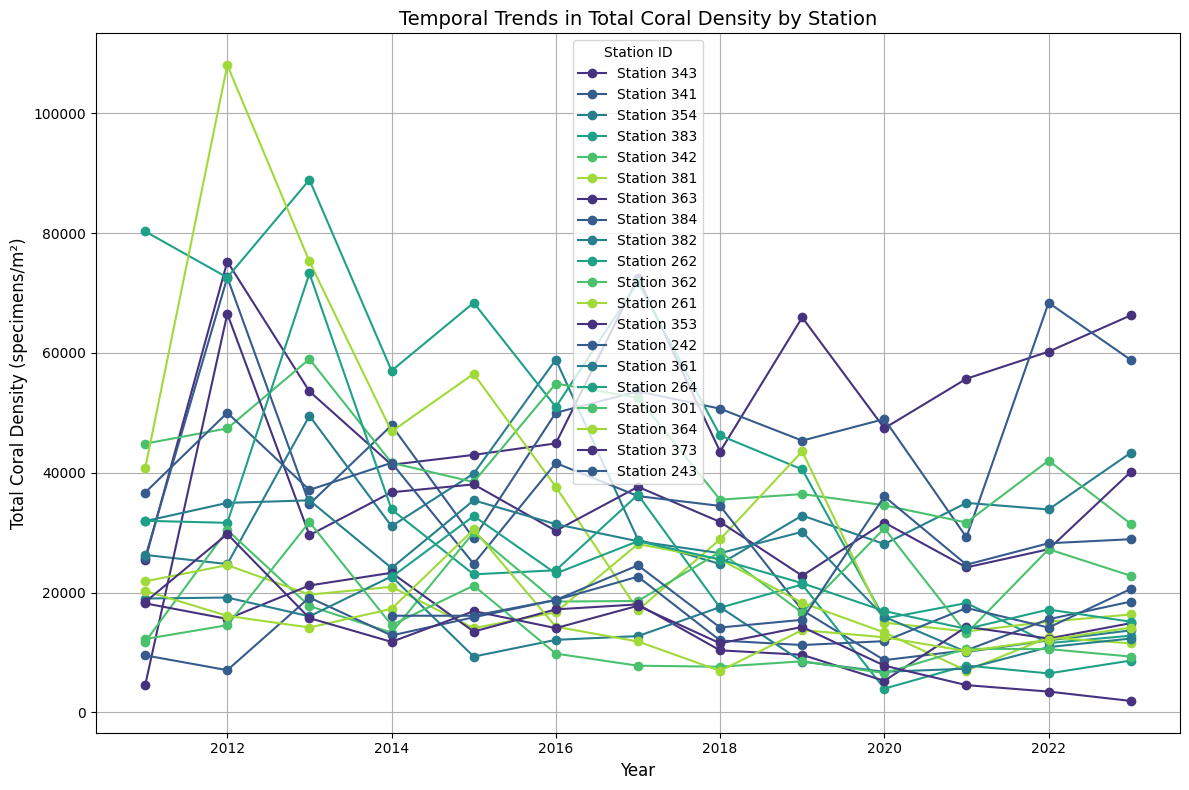

In [ ]:
def analyze_density_over_time(data, stations=None):
    """
    Analyze and visualize coral density trends over time.
    Parameters:
        data: DataFrame containing coral data
        stations: List of station IDs to include (None for all)
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:40]  # Limit to first 5 if not specified

    # Get total density per station and year
    density_summary = filtered_data.groupby(['Year', 'StationID'])[density_cols].sum().reset_index()

    # For species-specific analysis, sum the densities for each species by station and year
    # Creating a melted dataframe for easier plotting
    melted_density = pd.melt(
        density_summary,
        id_vars=['Year', 'StationID'],
        value_vars=density_cols,
        var_name='Species',
        value_name='Density'
    )

    # Remove the prefix from species names
    melted_density['Species'] = melted_density['Species'].str.replace('SCOR_Density_', '')

    # Create total density plot
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = melted_density[melted_density['StationID'] == station]
        station_total = station_data.groupby('Year')['Density'].sum().reset_index()
        ax.plot(station_total['Year'], station_total['Density'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Coral Density (specimens/m²)', fontsize=12)
    ax.set_title('Temporal Trends in Total Coral Density by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('density_trends_over_time.png', dpi=300)
    plt.show()

    # Create interactive species density plot for a selected station
    if stations:
        selected_station = stations[0]
        station_species_data = melted_density[melted_density['StationID'] == selected_station]

        # Get the top 10 species by density
        top_species = station_species_data.groupby('Species')['Density'].sum().nlargest(10).index
        station_species_data = station_species_data[station_species_data['Species'].isin(top_species)]

        fig = px.line(
            station_species_data,
            x='Year',
            y='Density',
            color='Species',
            title=f'Density Trends for Top 10 Species at Station {selected_station}',
            labels={'Density': 'Coral Density (specimens/m²)', 'Year': 'Year'},
            line_shape='linear',
            markers=True
        )

        fig.update_layout(
            legend_title_text='Species',
            xaxis_title='Year',
            yaxis_title='Density (specimens/m²)',
            template='plotly_white'
        )

        # Save as HTML for interactive viewing
        fig.write_html(f'density_trends_station_{selected_station}.html')
        fig.show()

    return melted_density

# Execute density analysis for stations 18 and a few others for comparison
density_data = analyze_density_over_time(merged, list(merged['StationID'].value_counts().head(20).index))


In [ ]:
(merged['StationID'].value_counts().head(20).index)

Index([343, 341, 354, 383, 342, 381, 363, 384, 382, 262, 362, 261, 353, 242,
       361, 264, 301, 364, 373, 243],
      dtype='int64', name='StationID')

### analyze_species_composition

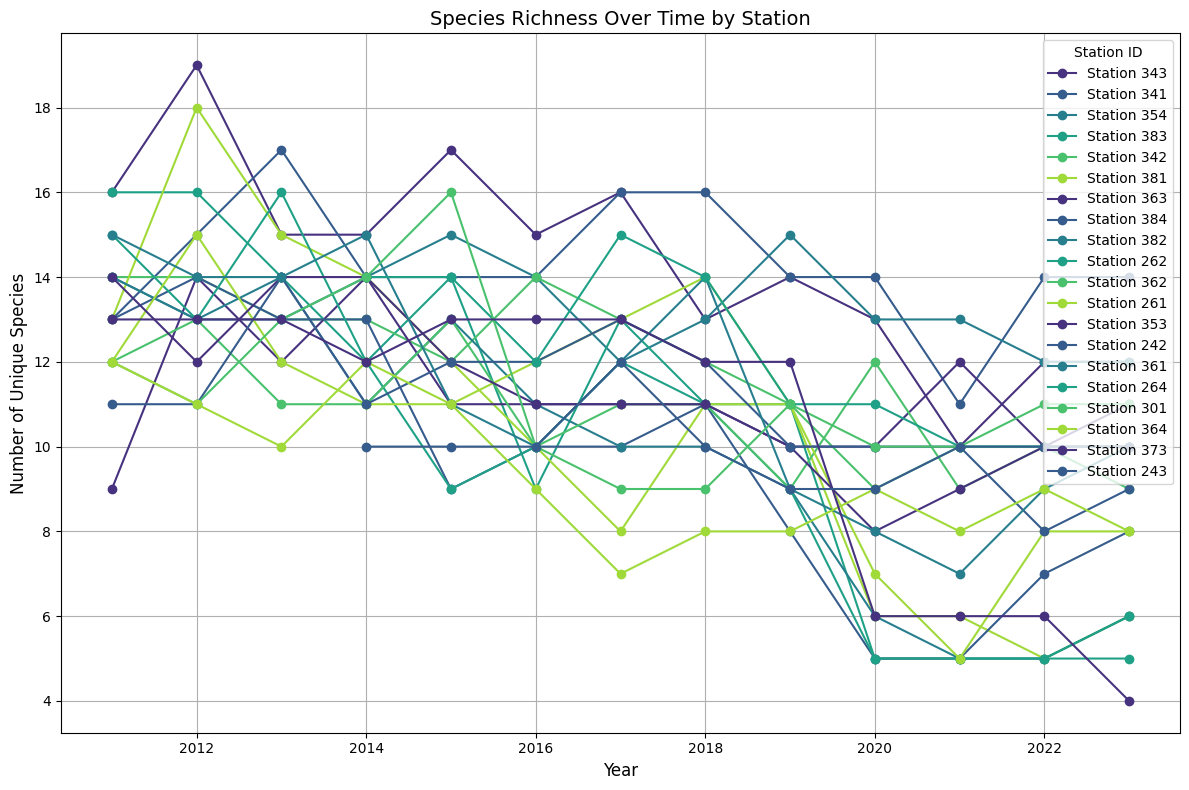

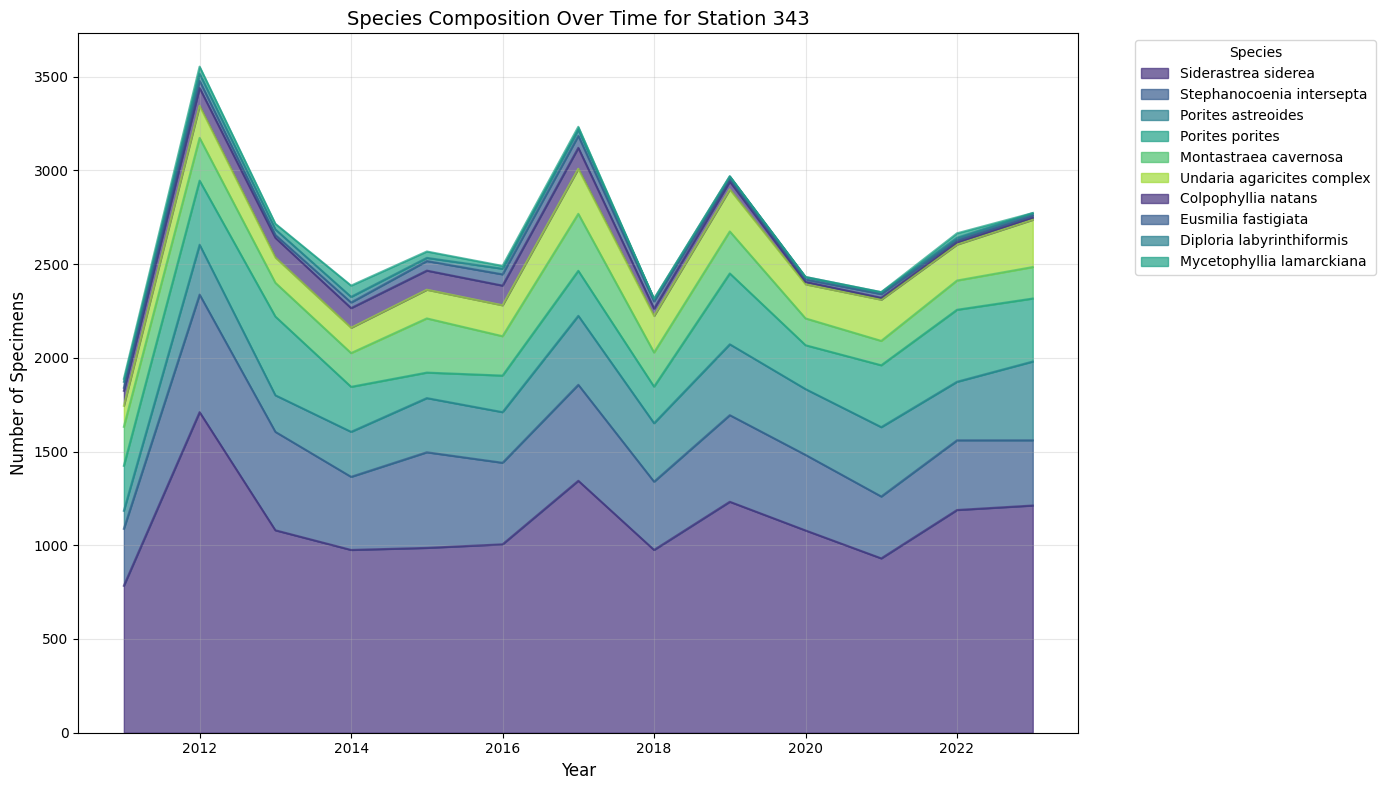

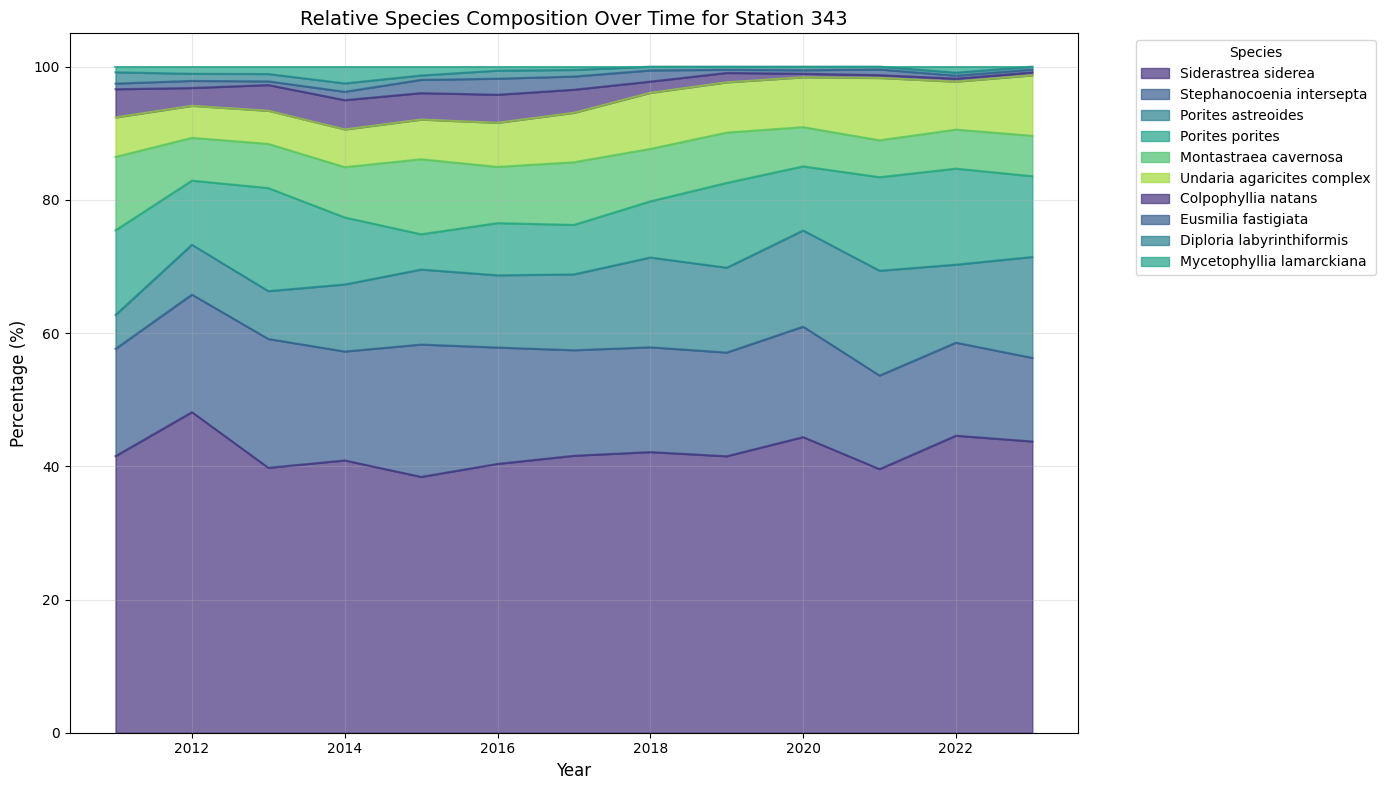

In [ ]:
def analyze_species_composition(data, stations=None):
    """
    Analyze and visualize changes in species composition over time.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:5]

    # Group by year and station to get species counts
    species_data = filtered_data.groupby(['Year', 'StationID']).agg({
        'SCOR_RawData_sciName': lambda x: x.nunique(),
        'SCOR_RawData_SPP_CODE': 'count'
    }).reset_index()

    species_data.columns = ['Year', 'StationID', 'UniqueSpecies', 'SpecimenCount']

    # Create a plot for species richness over time
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = species_data[species_data['StationID'] == station]
        ax.plot(station_data['Year'], station_data['UniqueSpecies'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Unique Species', fontsize=12)
    ax.set_title('Species Richness Over Time by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('species_richness_over_time.png', dpi=300)
    plt.show()

    # Create stacked area charts for species composition
    # For this, we need detailed species counts by year and station
    for station in stations[:1]:  # Just do the first station as an example
        station_filtered = filtered_data[filtered_data['StationID'] == station]

        # Get counts of each species by year
        species_counts = station_filtered.groupby(['Year', 'SCOR_RawData_sciName']).size().reset_index(name='Count')

        # Pivot to get species as columns
        species_pivot = species_counts.pivot(index='Year', columns='SCOR_RawData_sciName', values='Count').fillna(0)

        # Get the top 10 species
        top_species = species_pivot.sum().nlargest(10).index
        species_pivot_top = species_pivot[top_species]

        # Create a stacked area chart
        plt.figure(figsize=(14, 8))
        species_pivot_top.plot.area(stacked=True, ax=plt.gca(), alpha=0.7, colormap='viridis')

        plt.title(f'Species Composition Over Time for Station {station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Specimens', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'species_composition_station_{station}.png', dpi=300)
        plt.show()

        # Create a relative (percentage) stacked area chart
        species_pivot_top_percent = species_pivot_top.div(species_pivot_top.sum(axis=1), axis=0) * 100

        plt.figure(figsize=(14, 8))
        species_pivot_top_percent.plot.area(stacked=True, ax=plt.gca(), alpha=0.7, colormap='viridis')

        plt.title(f'Relative Species Composition Over Time for Station {station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'relative_species_composition_station_{station}.png', dpi=300)
        plt.show()

    return species_data

# Execute species composition analysis
species_analysis = analyze_species_composition(merged, list(merged['StationID'].value_counts().head(20).index))


### analyze_percent_cover

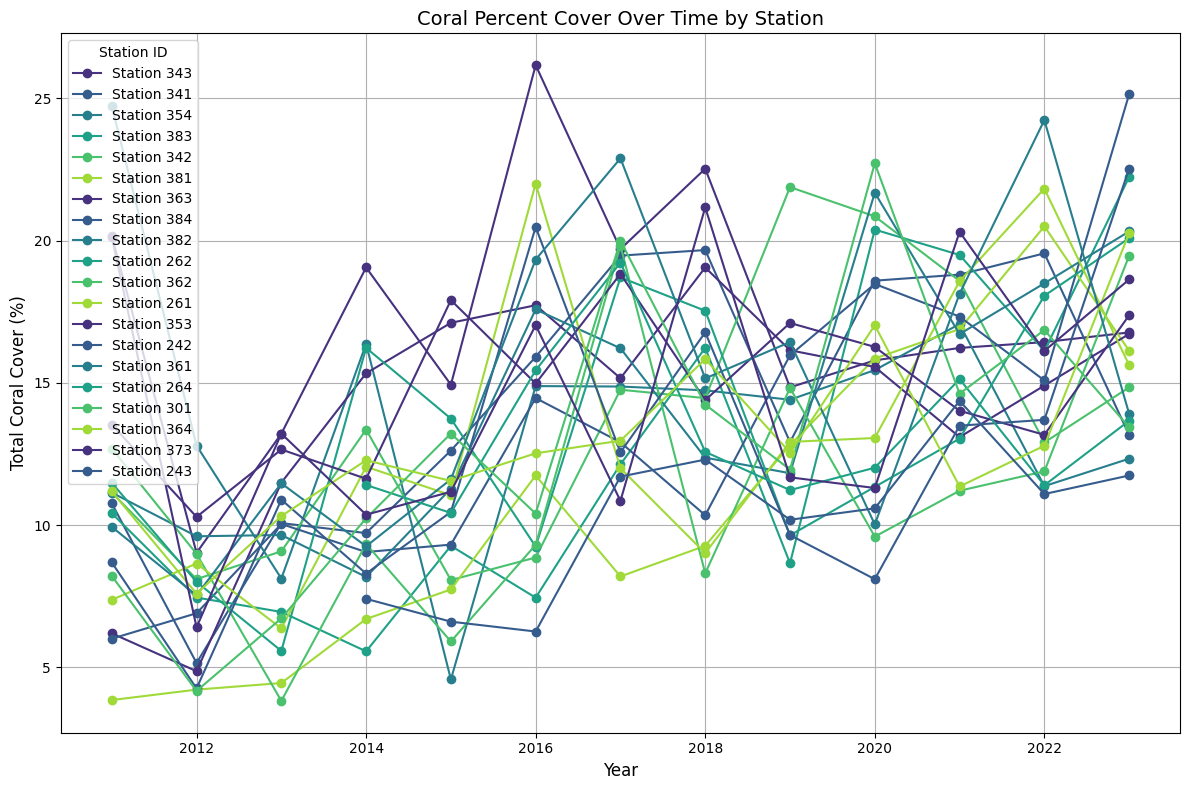

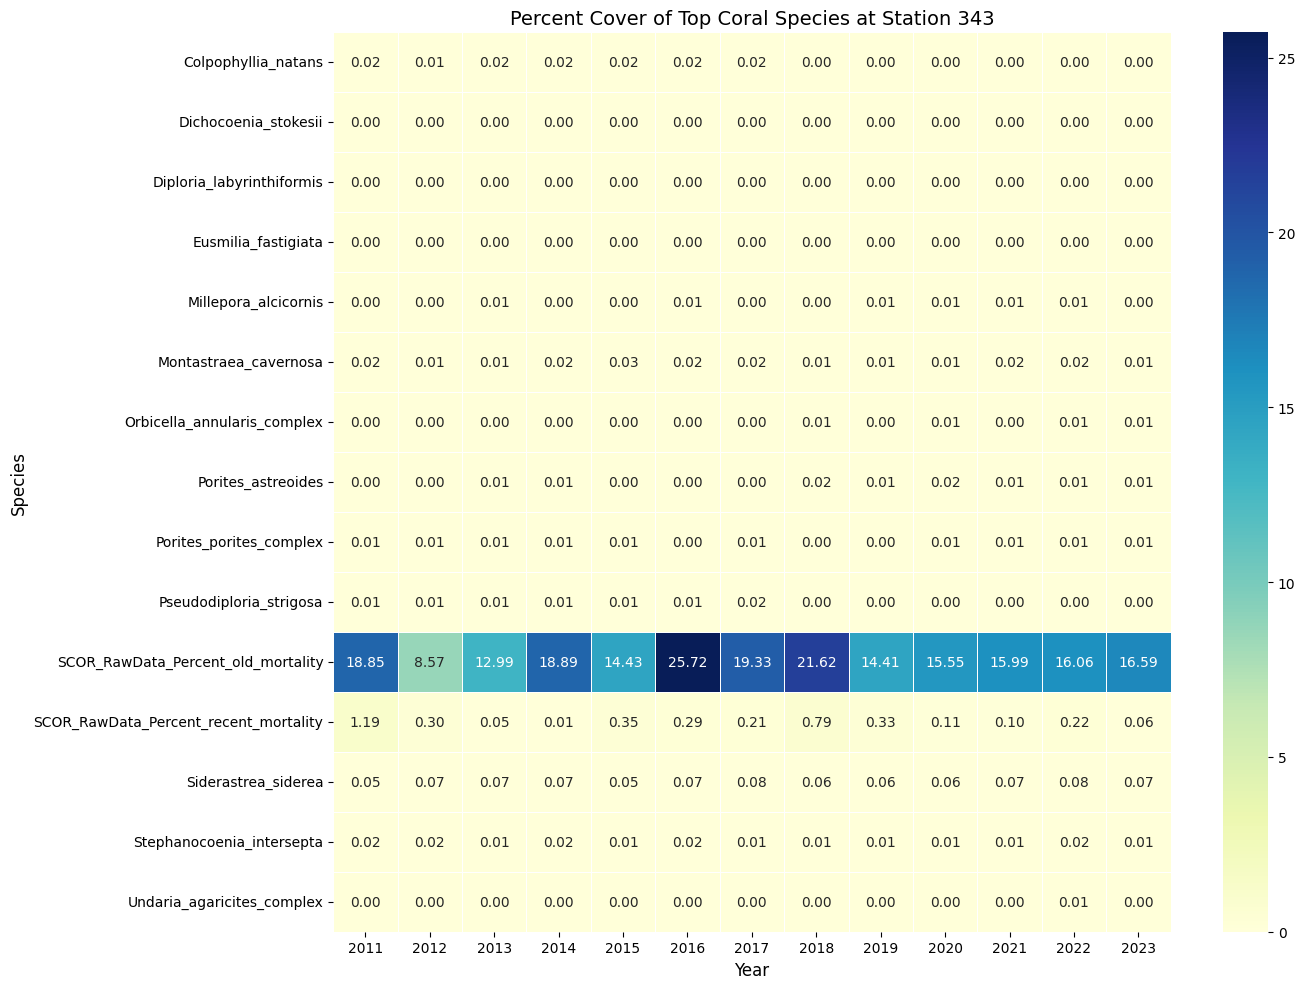

In [ ]:
def analyze_percent_cover(data, stations=None):
    """
    Analyze and visualize changes in percent cover over time.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:5]

    # For percent cover, we need to properly aggregate by year and station
    cover_summary = filtered_data.groupby(['Year', 'StationID'])[cover_cols].mean().reset_index()

    # Calculate total percent cover (sum of all species)
    # First, identify columns that represent individual species cover
    species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]
    cover_summary['TotalCover'] = cover_summary[species_cover_cols].sum(axis=1)

    # Create a plot for total percent cover over time
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = cover_summary[cover_summary['StationID'] == station]
        ax.plot(station_data['Year'], station_data['TotalCover'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Coral Cover (%)', fontsize=12)
    ax.set_title('Coral Percent Cover Over Time by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('percent_cover_over_time.png', dpi=300)
    plt.show()

    # Create a heatmap for species cover at one station
    if stations:
        selected_station = stations[0]
        station_cover = cover_summary[cover_summary['StationID'] == selected_station]

        # Select top species by average cover
        top_cover_species = station_cover[species_cover_cols].mean().nlargest(15).index

        # Melt the dataframe for easier plotting
        melted_cover = pd.melt(
            station_cover,
            id_vars=['Year'],
            value_vars=top_cover_species,
            var_name='Species',
            value_name='PercentCover'
        )

        # Clean species names
        melted_cover['Species'] = melted_cover['Species'].str.replace('Pcover_StonyCoralSpecies_', '')

        # Create a pivot table for the heatmap
        cover_pivot = melted_cover.pivot(index='Species', columns='Year', values='PercentCover')

        plt.figure(figsize=(14, 10))
        sns.heatmap(cover_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
        plt.title(f'Percent Cover of Top Coral Species at Station {selected_station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Species', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'species_cover_heatmap_station_{selected_station}.png', dpi=300)
        plt.show()

    return cover_summary

# Execute percent cover analysis
cover_analysis = analyze_percent_cover(merged, list(merged['StationID'].value_counts().head(20).index))


### perform_multivariate_analysis

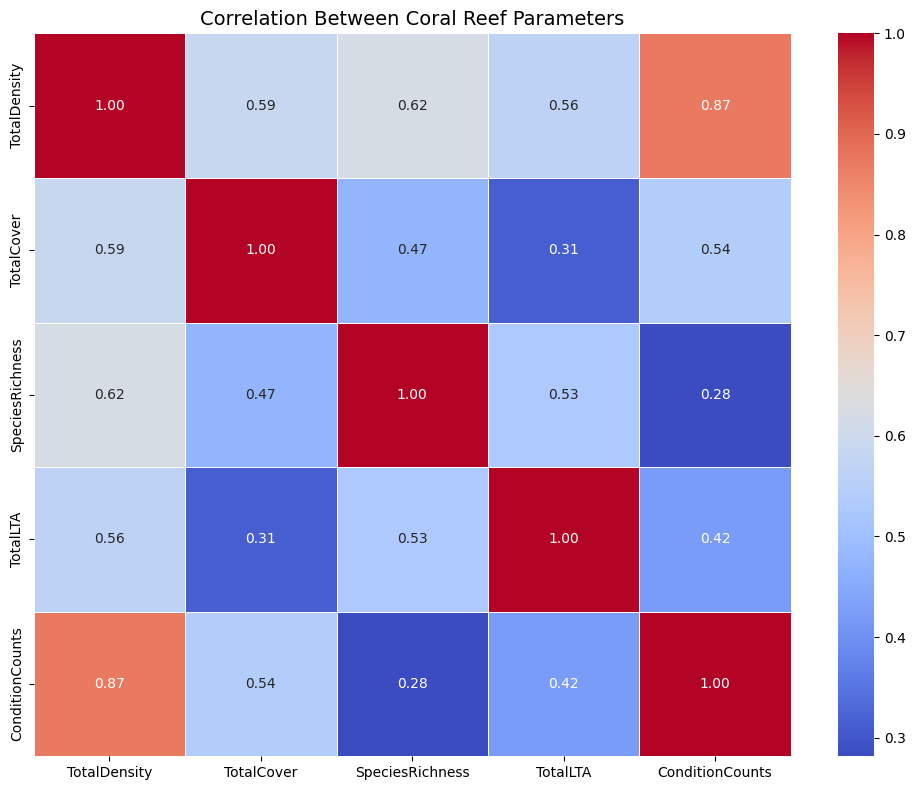

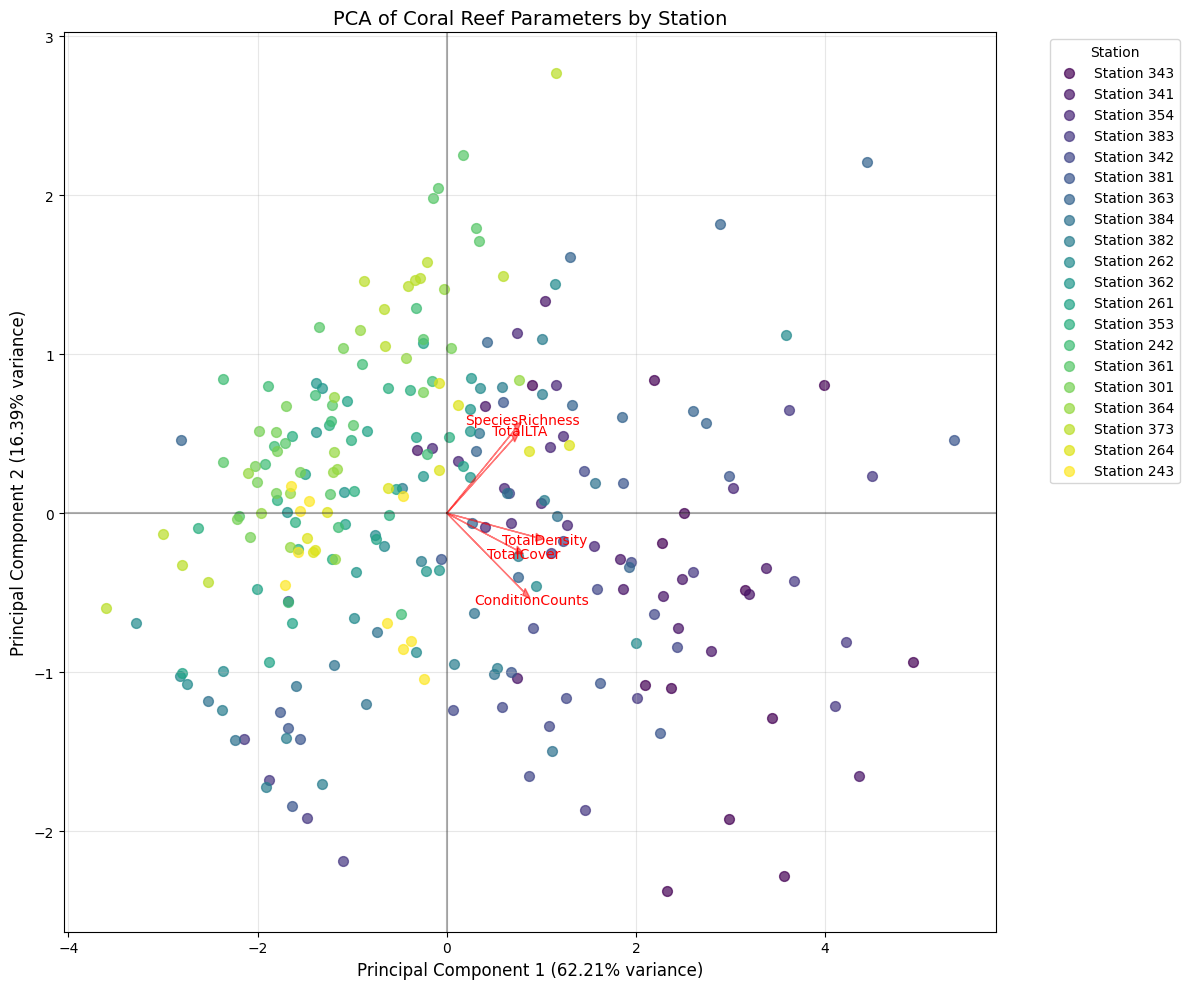

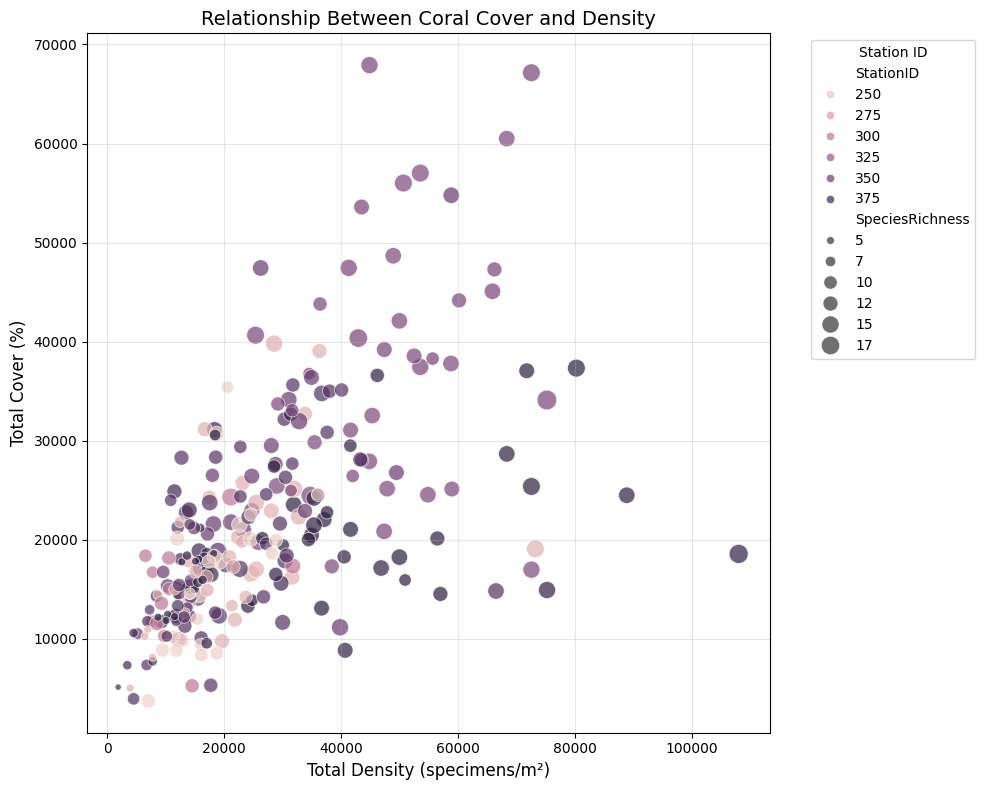

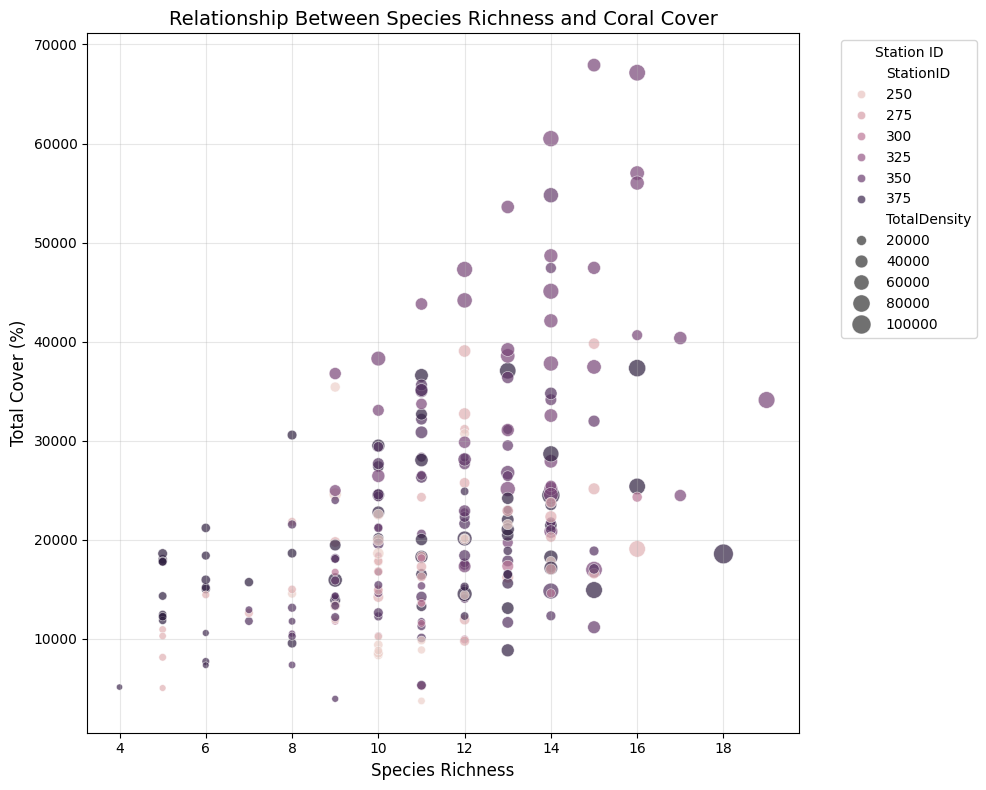

In [ ]:
def perform_multivariate_analysis(data, stations=None):
    """
    Perform multivariate analysis to identify relationships between parameters.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:10]  # Limit to first 10 stations

    # Prepare a dataframe with aggregated metrics by station and year
    station_year_metrics = []

    for year in filtered_data['Year'].unique():
        year_data = filtered_data[filtered_data['Year'] == year]

        for station in stations:
            station_data = year_data[year_data['StationID'] == station]

            if len(station_data) == 0:
                continue

            # Calculate key metrics
            metrics = {
                'Year': year,
                'StationID': station
            }

            # Density metrics
            total_density = station_data[density_cols].sum().sum()
            metrics['TotalDensity'] = total_density

            # Cover metrics
            species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]
            total_cover = station_data[species_cover_cols].sum().sum()
            metrics['TotalCover'] = total_cover

            # Species metrics
            species_richness = station_data['SCOR_RawData_sciName'].nunique() if 'SCOR_RawData_sciName' in station_data.columns else 0
            metrics['SpeciesRichness'] = species_richness

            # LTA metrics
            total_lta = station_data[LTA_cols].sum().sum()
            metrics['TotalLTA'] = total_lta

            # Condition metrics (if available)
            if len(condition_counts_cols) > 0:
                condition_metrics = station_data[condition_counts_cols].sum().sum()
                metrics['ConditionCounts'] = condition_metrics

            station_year_metrics.append(metrics)

    metrics_df = pd.DataFrame(station_year_metrics)

    # 1. Correlation Analysis
    if len(metrics_df) > 0:
        numeric_cols = ['TotalDensity', 'TotalCover', 'SpeciesRichness', 'TotalLTA']
        if 'ConditionCounts' in metrics_df.columns:
            numeric_cols.append('ConditionCounts')

        plt.figure(figsize=(10, 8))
        correlation_matrix = metrics_df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Between Coral Reef Parameters', fontsize=14)
        plt.tight_layout()
        plt.savefig('parameter_correlation.png', dpi=300)
        plt.show()

    # 2. PCA Analysis for station comparison
    if len(metrics_df) > 5:  # Need enough data points for meaningful PCA
        # Prepare data for PCA
        pca_data = metrics_df[numeric_cols].copy()

        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data)

        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)

        # Create a dataframe with the principal components
        pca_df = pd.DataFrame(
            data=principal_components,
            columns=['PC1', 'PC2']
        )

        # Add metadata
        pca_df['StationID'] = metrics_df['StationID']
        pca_df['Year'] = metrics_df['Year']

        # Create PCA plot
        plt.figure(figsize=(12, 10))

        # Color by station
        stations_unique = pca_df['StationID'].unique()
        colors = plt.cm.viridis(np.linspace(0, 1, len(stations_unique)))

        for i, station in enumerate(stations_unique):
            station_pca = pca_df[pca_df['StationID'] == station]
            plt.scatter(
                station_pca['PC1'],
                station_pca['PC2'],
                c=[colors[i]],
                label=f'Station {station}',
                alpha=0.7,
                s=50
            )

        # Add arrows for feature loadings
        feature_names = numeric_cols
        loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

        for i, feature in enumerate(feature_names):
            plt.arrow(
                0, 0,
                loadings[i, 0],
                loadings[i, 1],
                color='red',
                alpha=0.5,
                head_width=0.05
            )
            plt.text(
                loadings[i, 0] * 1.1,
                loadings[i, 1] * 1.1,
                feature,
                color='red',
                ha='center',
                va='center'
            )

        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
        plt.title('PCA of Coral Reef Parameters by Station', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('pca_analysis.png', dpi=300)
        plt.show()

    # 3. Create scatter plots to explore relationships
    if len(metrics_df) > 0:
        # Cover vs. Density
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            data=metrics_df,
            x='TotalDensity',
            y='TotalCover',
            hue='StationID',
            size='SpeciesRichness',
            sizes=(20, 200),
            alpha=0.7
        )
        plt.title('Relationship Between Coral Cover and Density', fontsize=14)
        plt.xlabel('Total Density (specimens/m²)', fontsize=12)
        plt.ylabel('Total Cover (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('cover_vs_density.png', dpi=300)
        plt.show()

        # Richness vs. Cover
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            data=metrics_df,
            x='SpeciesRichness',
            y='TotalCover',
            hue='StationID',
            size='TotalDensity',
            sizes=(20, 200),
            alpha=0.7
        )
        plt.title('Relationship Between Species Richness and Coral Cover', fontsize=14)
        plt.xlabel('Species Richness', fontsize=12)
        plt.ylabel('Total Cover (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('richness_vs_cover.png', dpi=300)
        plt.show()

    return metrics_df
condition_counts_cols.remove('SCOR_ConditionCounts_sciName')

# Execute multivariate analysis
multivariate_results = perform_multivariate_analysis(merged, list(merged['StationID'].value_counts().head(20).index))


### analyze_trends_and_forecast

Station 343 ADF Statistic: -3.7136339933173366
Station 343 p-value: 0.003925416022135777


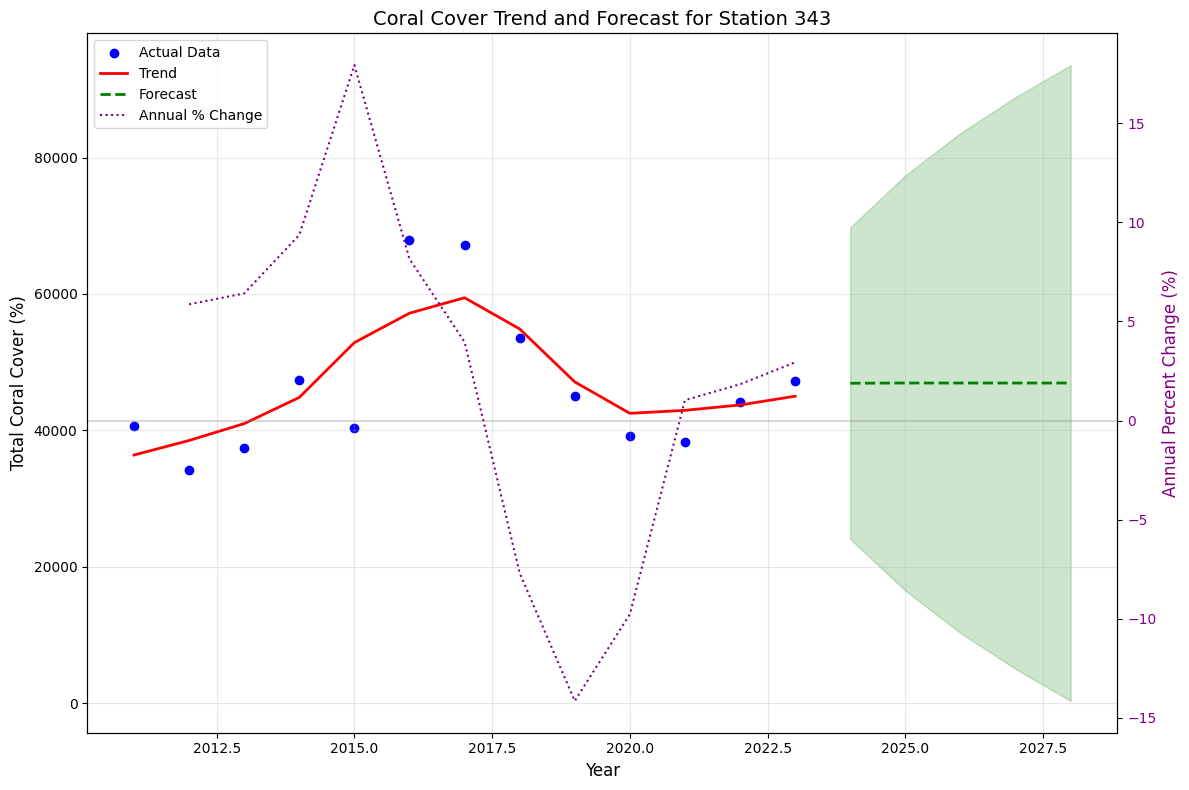

Station 341 ADF Statistic: -1.3098085433629378
Station 341 p-value: 0.624673031299805


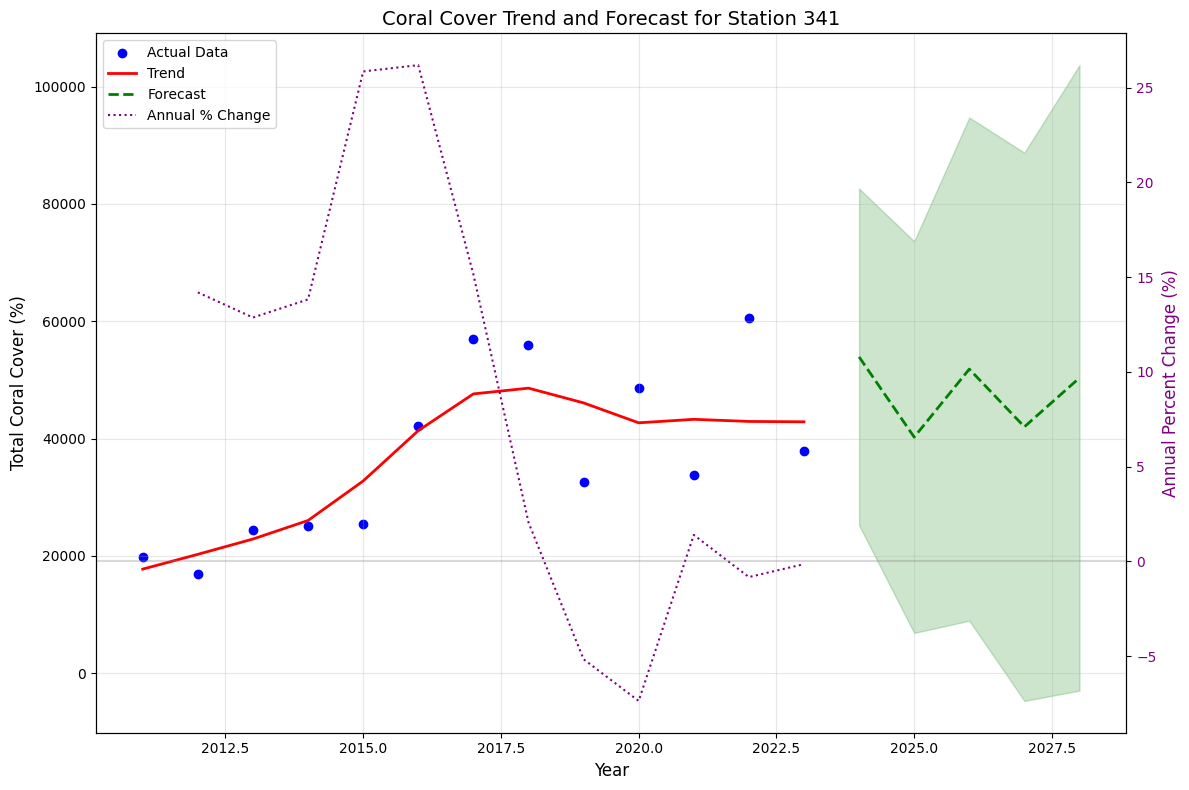

Station 354 ADF Statistic: -2.768963722638142
Station 354 p-value: 0.06284566057802436


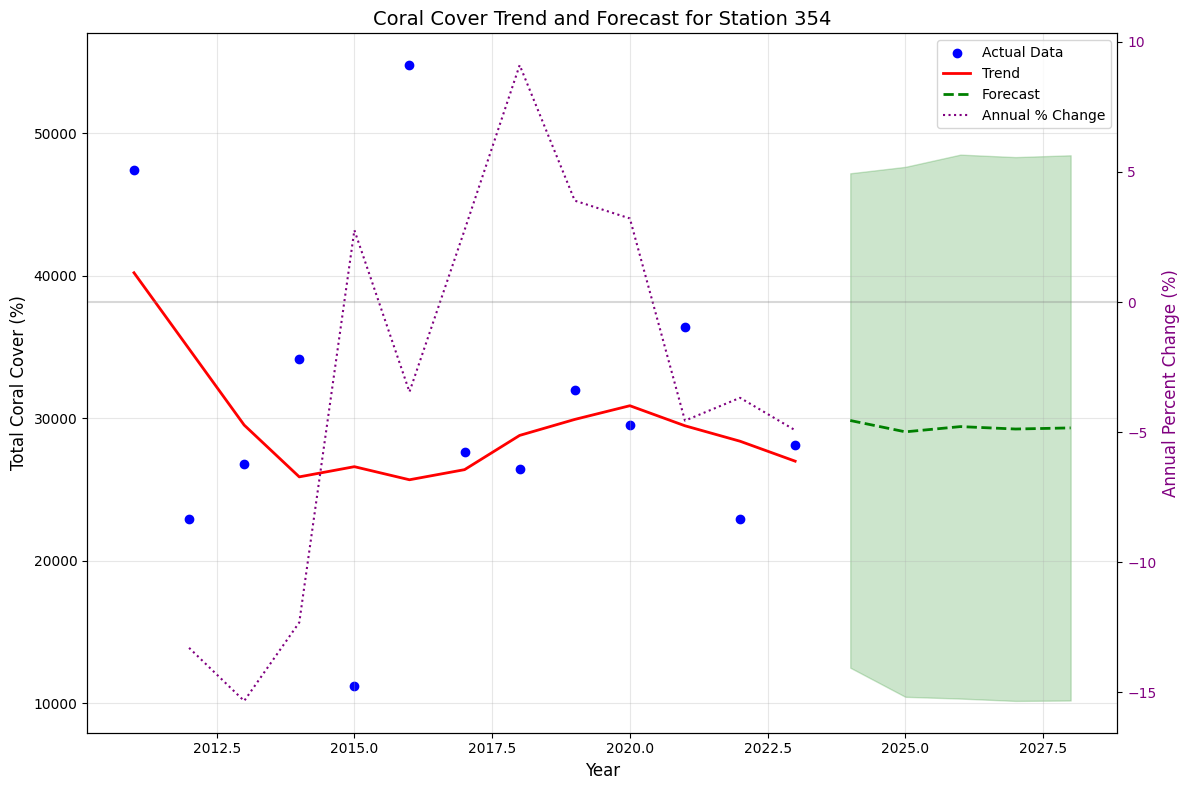

Station 383 ADF Statistic: -3.0811112410522488
Station 383 p-value: 0.0279829892848316


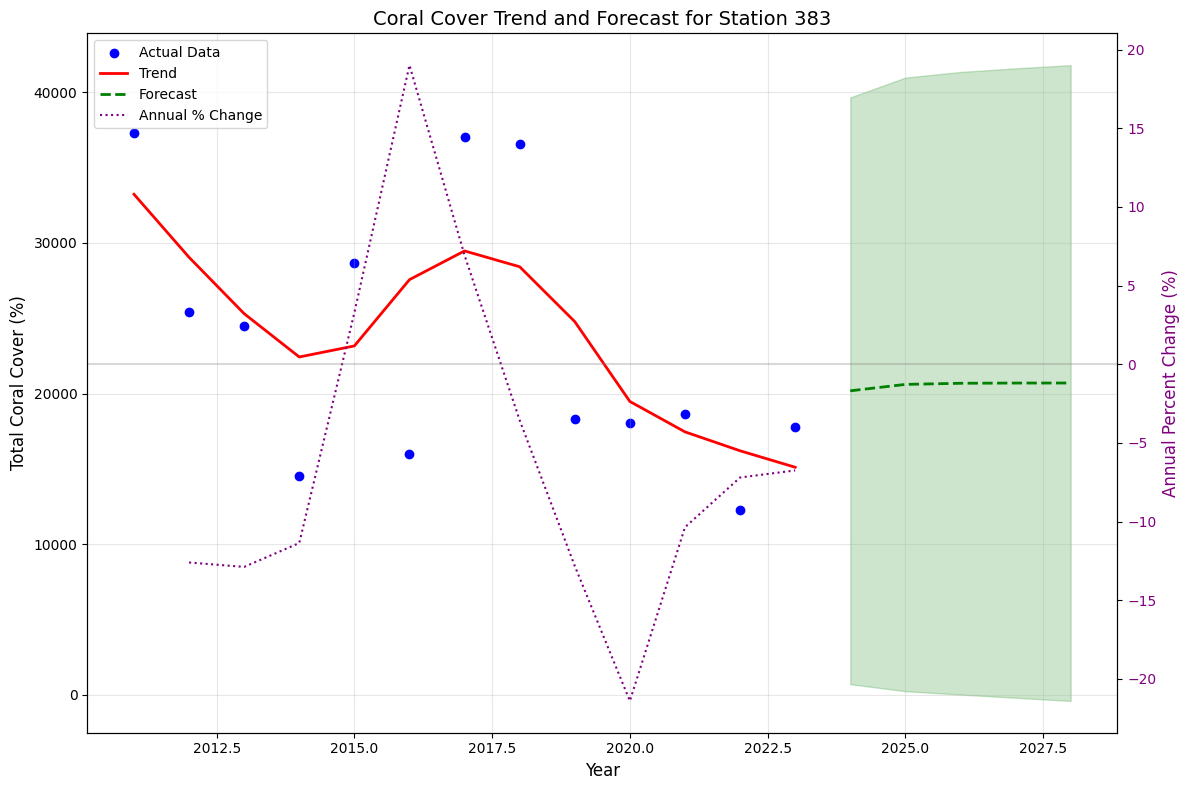

Station 342 ADF Statistic: -2.316998489904284
Station 342 p-value: 0.16654421383094953


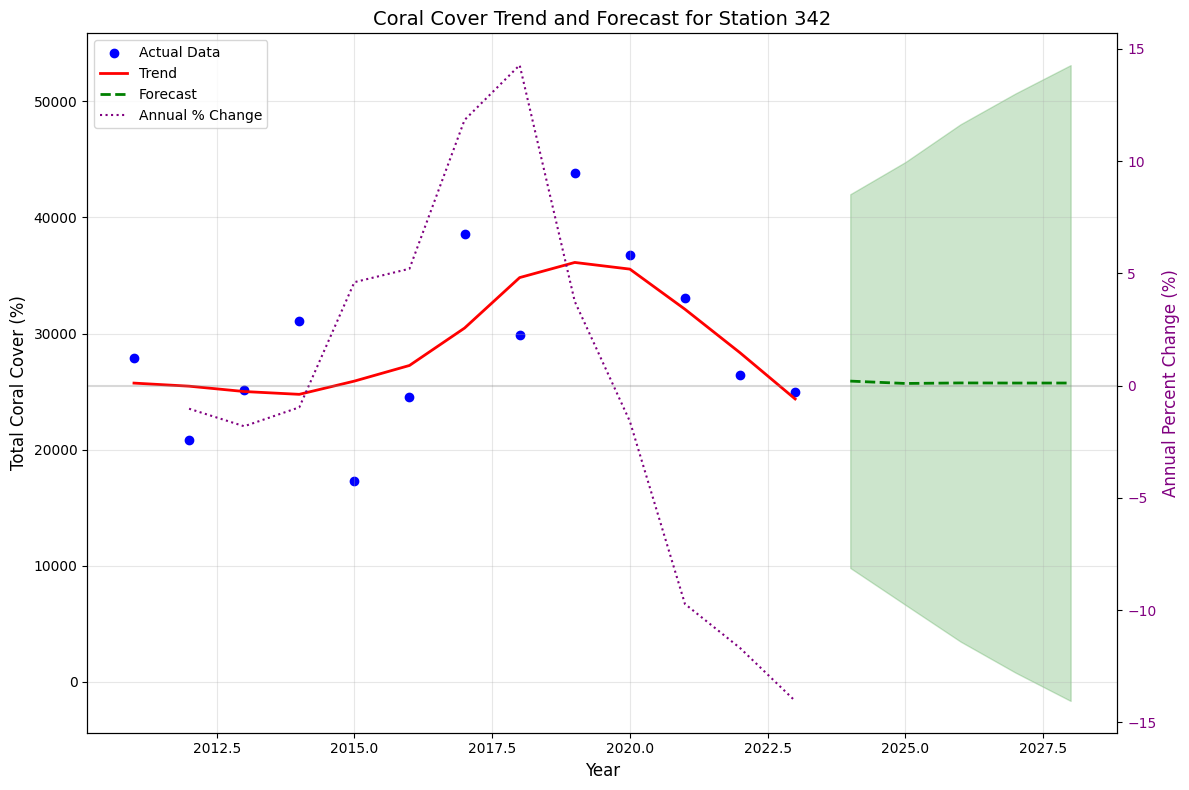

In [ ]:
def analyze_trends_and_forecast(data, stations=None, forecast_years=5):
    """
    Analyze trends and forecast future conditions for coral reefs.
    """
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.nonparametric.smoothers_lowess import lowess

    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:3]  # Limit to first 3 stations

    # Prepare time series data for total cover
    species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]

    for station in stations:
        station_data = filtered_data[filtered_data['StationID'] == station]

        # Group by year and calculate total cover
        yearly_cover = station_data.groupby('Year')[species_cover_cols].sum().sum(axis=1).reset_index()
        yearly_cover.columns = ['Year', 'TotalCover']

        if len(yearly_cover) < 5:  # Need enough data points for meaningful analysis
            print(f"Not enough data points for Station {station}")
            continue

        # Check for stationarity
        adf_result = adfuller(yearly_cover['TotalCover'].dropna())
        print(f"Station {station} ADF Statistic: {adf_result[0]}")
        print(f"Station {station} p-value: {adf_result[1]}")

        # Apply LOWESS smoothing for trend analysis
        filtered = lowess(
            yearly_cover['TotalCover'],
            yearly_cover['Year'],
            is_sorted=True,
            frac=0.6,
            it=3
        )

        trend = pd.DataFrame(filtered, columns=['Year', 'Trend'])

        # Calculate annual percent change
        trend['PercentChange'] = trend['Trend'].pct_change() * 100

        # Create visualization
        fig, ax1 = plt.subplots(figsize=(12, 8))

        # Plot actual data and trend
        ax1.scatter(yearly_cover['Year'], yearly_cover['TotalCover'], color='blue', label='Actual Data')
        ax1.plot(trend['Year'], trend['Trend'], color='red', linewidth=2, label='Trend')

        # If we have enough data, attempt forecasting
        if len(yearly_cover) >= 5:
            try:
                # Fit ARIMA model
                model = ARIMA(yearly_cover['TotalCover'], order=(1,1,1))
                model_fit = model.fit()

                # Forecast
                last_year = yearly_cover['Year'].max()
                forecast_years_range = range(last_year + 1, last_year + forecast_years + 1)
                forecast = model_fit.forecast(steps=forecast_years)

                # Plot forecast
                ax1.plot(
                    forecast_years_range,
                    forecast,
                    color='green',
                    linestyle='--',
                    linewidth=2,
                    label='Forecast'
                )

                # Add forecast confidence interval
                forecast_ci = model_fit.get_forecast(steps=forecast_years).conf_int()
                ax1.fill_between(
                    forecast_years_range,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1],
                    color='green',
                    alpha=0.2
                )
            except:
                print(f"Forecasting failed for Station {station}")

        ax1.set_xlabel('Year', fontsize=12)
        ax1.set_ylabel('Total Coral Cover (%)', fontsize=12)
        ax1.set_title(f'Coral Cover Trend and Forecast for Station {station}', fontsize=14)
        ax1.grid(True, alpha=0.3)
        ax1.legend(loc='upper left')

        # Add a second y-axis for percent change
        ax2 = ax1.twinx()
        ax2.plot(
            trend['Year'][1:],
            trend['PercentChange'][1:],
            color='purple',
            linestyle=':',
            linewidth=1.5,
            label='Annual % Change'
        )
        ax2.set_ylabel('Annual Percent Change (%)', fontsize=12, color='purple')
        ax2.tick_params(axis='y', labelcolor='purple')

        # Add horizontal line at 0% change
        ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

        # Add legend for second y-axis
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='best')

        plt.tight_layout()
        plt.savefig(f'trend_forecast_station_{station}.png', dpi=300)
        plt.show()

    return None

# Execute trend analysis and forecasting
analyze_trends_and_forecast(merged, stations=list(merged['StationID'].value_counts().head(5).index))


### dashboard

In [ ]:
def create_comprehensive_dashboard(data, selected_station):
    """
    Create a comprehensive dashboard for a selected station.
    """
    import dash
    from dash import dcc, html
    from dash.dependencies import Input, Output
    import plotly.graph_objects as go
    from jupyter_dash import JupyterDash

    # Filter data for the selected station
    station_data = data[data['StationID'] == selected_station]

    # Prepare data for time series
    species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]

    # Group by year for time series
    yearly_metrics = station_data.groupby('Year').agg({
        'SCOR_RawData_sciName': 'nunique',
        **{col: 'sum' for col in density_cols}
    }).reset_index()

    yearly_metrics['TotalDensity'] = yearly_metrics[density_cols].sum(axis=1)
    yearly_metrics['SpeciesRichness'] = yearly_metrics['SCOR_RawData_sciName']

    # Initialize the Dash app
    app = JupyterDash(__name__)

    app.layout = html.Div([
        html.H1(f"Coral Reef Dashboard - Station {selected_station}"),

        html.Div([
            html.H3("Time Series Analysis"),
            dcc.Graph(
                id='time-series-metrics',
                figure={
                    'data': [
                        go.Scatter(
                            x=yearly_metrics['Year'],
                            y=yearly_metrics['TotalDensity'],
                            mode='lines+markers',
                            name='Total Density'
                        ),
                        go.Scatter(
                            x=yearly_metrics['Year'],
                            y=yearly_metrics['SpeciesRichness'],
                            mode='lines+markers',
                            name='Species Richness',
                            yaxis='y2'
                        )
                    ],
                    'layout': go.Layout(
                        title='Density and Species Richness Over Time',
                        xaxis={'title': 'Year'},
                        yaxis={'title': 'Total Density (specimens/m²)'},
                        yaxis2={
                            'title': 'Species Richness',
                            'overlaying': 'y',
                            'side': 'right'
                        },
                        legend={'x': 0, 'y': 1.2},
                        height=500
                    )
                }
            )
        ]),

        html.Div([
            html.H3("Species Composition"),
            dcc.Graph(id='species-composition-pie'),
            dcc.Slider(
                id='year-slider',
                min=yearly_metrics['Year'].min(),
                max=yearly_metrics['Year'].max(),
                step=1,
                marks={str(year): str(year) for year in yearly_metrics['Year'].unique()},
                value=yearly_metrics['Year'].max()
            )
        ]),

        html.Div([
            html.H3("Parameter Relationships"),
            dcc.Graph(id='parameter-relationships')
        ])
    ])

    @app.callback(
        Output('species-composition-pie', 'figure'),
        [Input('year-slider', 'value')]
    )
    def update_pie_chart(selected_year):
        year_data = station_data[station_data['Year'] == selected_year]

        # Get species counts
        species_counts = year_data['SCOR_RawData_sciName'].value_counts()

        # Limit to top 10 species
        if len(species_counts) > 10:
            other_count = species_counts[10:].sum()
            species_counts = species_counts[:10]
            species_counts['Other Species'] = other_count

        return {
            'data': [go.Pie(
                labels=species_counts.index,
                values=species_counts.values,
                hole=0.3,
                textinfo='label+percent'
            )],
            'layout': go.Layout(
                title=f'Species Composition in {selected_year}',
                height=500
            )
        }

    @app.callback(
        Output('parameter-relationships', 'figure'),
        [Input('year-slider', 'value')]
    )
    def update_scatter_plot(selected_year):
        # For this example, we'll create a scatter plot of condition vs. size
        year_data = station_data[station_data['Year'] == selected_year]

        # Create a scatter plot of diameter vs. height
        return {
            'data': [go.Scatter(
                x=year_data['SCOR_RawData_Diameter_cm'],
                y=year_data['SCOR_RawData_Height_cm'],
                mode='markers',
                marker={
                    'size': 10,
                    'opacity': 0.7,
                    'color': year_data['SCOR_RawData_Percent_old_mortality'],
                    'colorscale': 'Viridis',
                    'colorbar': {'title': 'Old Mortality (%)'}
                },
                text=year_data['SCOR_RawData_sciName'],
                hovertemplate='Species: %{text}<br>Diameter: %{x} cm<br>Height: %{y} cm'
            )],
            'layout': go.Layout(
                title=f'Coral Size Parameters in {selected_year}',
                xaxis={'title': 'Diameter (cm)'},
                yaxis={'title': 'Height (cm)'},
                height=500
            )
        }

    return app


dashboard_app = create_comprehensive_dashboard(merged, list(merged['StationID'].value_counts().head(20).index)[0])
dashboard_app.run_server(mode='inline')


AttributeError: 'super' object has no attribute 'run_server'

In [ ]:
!pip install jupyter_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00


In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


### OCTO

In [ ]:
data_dict['CREMP_OCTO_RawData_2023']['SiteID'].unique()

array([32, 33, 34, 35, 36, 38, 50, 54, 55, 56, 59, 61, 70, 74, 75, 76, 79,
       81, 52, 72, 26])

In [ ]:
data_dict['CREMP_OCTO_Summaries_2023_Density']

Year  SiteID  StationID  OCTO_Density_Eunicea_calyculata  \
0     2011      32        321                              0.0   
1     2011      32        322                              0.1   
2     2011      32        323                              0.4   
3     2011      32        324                              0.5   
4     2011      33        331                              0.0   
...    ...     ...        ...                              ...   
1018  2023      79        794                              NaN   
1019  2023      81        811                              NaN   
1020  2023      81        812                              NaN   
1021  2023      81        813                              NaN   
1022  2023      81        814                              NaN   

      OCTO_Density_Gorgonia_ventalina  \
0                                 0.9   
1                                 0.3   
2                                 0.4   
3                                 0.6   
4                                 1.7   
...                               ...   
1018                              2.5   
1019                              1.8   
1020                              3.4   
1021                              4.6   
1022                              4.0   

      OCTO_Density_Pseudopterogorgia_americana  \
0                                          6.3   
1                                          5.9   
2                                          4.4   
3                                          6.1   
4                                          0.3   
...                                        ...   
1018                                       8.1   
1019                                       7.8   
1020                                      10.4   
1021                                      16.9   
1022                                      11.6   

      OCTO_Density_Pseudopterogorgia_bipinnata  OCTO_Density_Eunicea_flexuosa  \
0                                          NaN                            0.6   
1                                          NaN                            0.9   
2                                          NaN                            0.6   
3                                          NaN                            0.5   
4                                          NaN                            0.0   
...                                        ...                            ...   
1018                                       0.0                            0.0   
1019                                       0.7                            0.7   
1020                                       1.0                            0.7   
1021                                       0.4                            1.2   
1022                                       1.1                            0.7   

      OCTO_Density_Pseudoplexaura_porosa  OCTO_Density_Total_Octocorals  Month  
0                                    0.2                            9.0      6  
1                                    0.0                            NaN      6  
2                                    0.2                            7.2      6  
3                                    0.5                            8.6      6  
4                                    0.2                            2.3      6  
...                                  ...                            ...    ...  
1018                                 0.0                           16.3      6  
1019                                 0.0                           19.1      6  
1020                                 0.0                           29.1      6  
1021                                 0.0                           38.9      6  
1022                                 0.0                           33.4      6  

[1023 rows x 11 columns]

In [ ]:
octo = data_dict['CREMP_OCTO_RawData_2023']
data_dict['CREMP_OCTO_Summaries_2023_MeanHeight'] = data_dict['CREMP_OCTO_Summaries_2023_MeanHeight'].rename(columns={'OCTO_MeanHeight_stationid': 'StationID',
                                                                                                                      'OCTO_MeanHeight_siteid' : 'SiteID',
                                                                                                                      'OCTO_MeanHeight_site_name': 'Site_name',
                                                                                                                      'OCTO_MeanHeight_HabitatID':'Habitat',
                                                                                                                      'OCTO_MeanHeight_subRegionID' : 'Subregion',
                                                                                                                      'OCTO_MeanHeight_FirstOfDate' : 'Date'})
data_dict['CREMP_OCTO_Summaries_2023_MeanHeight']['Date'] = pd.to_datetime(data_dict['CREMP_OCTO_Summaries_2023_MeanHeight']['Date'], format='%m/%d/%Y')
data_dict['CREMP_OCTO_Summaries_2023_MeanHeight']['Month'] = data_dict['CREMP_OCTO_Summaries_2023_MeanHeight']['Date'].dt.month
# print(octo.columns)
for name , df in data_dict.items():
  print(name, df.columns)
  if (name != 'CREMP_OCTO_RawData_2023') and  ('OCTO' in name) or (name == 'CREMP_Pcover_2023_TaxaGroups'):
    octo = octo.merge(df, on=['SiteID', 'StationID', 'Month', 'Year'])
octo


CREMP_OCTO_RawData_2023 Index(['Year', 'SiteID', 'StationID', 'OCTO_RawData_SPP_Code',
       'OCTO_RawData_sciName', 'OCTO_RawData_Height_cm', 'Month'],
      dtype='object')
CREMP_OCTO_Summaries_2023_Density Index(['Year', 'SiteID', 'StationID', 'OCTO_Density_Eunicea_calyculata',
       'OCTO_Density_Gorgonia_ventalina',
       'OCTO_Density_Pseudopterogorgia_americana',
       'OCTO_Density_Pseudopterogorgia_bipinnata',
       'OCTO_Density_Eunicea_flexuosa', 'OCTO_Density_Pseudoplexaura_porosa',
       'OCTO_Density_Total_Octocorals', 'Month'],
      dtype='object')
CREMP_OCTO_Summaries_2023_MeanHeight Index(['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
       'StationID', 'OCTO_MeanHeight_Eunicea_calyculata',
       'OCTO_MeanHeight_Gorgonia_ventalina',
       'OCTO_MeanHeight_Pseudopterogorgia_americana',
       'OCTO_MeanHeight_Pseudopterogorgia_bipinnata',
       'OCTO_MeanHeight_Eunicea_flexuosa',
       'OCTO_MeanHeight_Pseudoplexaura_porosa', 'Month'],
    

Year  SiteID  StationID OCTO_RawData_SPP_Code  \
0       2011      32        321                  PAME   
1       2011      32        321                  PAME   
2       2011      32        321                  PAME   
3       2011      32        321                  PAME   
4       2011      32        321                  PAME   
...      ...     ...        ...                   ...   
108198  2023      81        814                  GVEN   
108199  2023      81        814                  PAME   
108200  2023      81        814                  PAME   
108201  2023      81        814                  PAME   
108202  2023      81        814                  PFLE   

               OCTO_RawData_sciName  OCTO_RawData_Height_cm  Month  \
0       Pseudopterogorgia americana                     9.0      6   
1       Pseudopterogorgia americana                    54.0      6   
2       Pseudopterogorgia americana                    12.0      6   
3       Pseudopterogorgia americana                    11.0      6   
4       Pseudopterogorgia americana                    11.0      6   
...                             ...                     ...    ...   
108198           Gorgonia ventalina                     5.0      6   
108199  Pseudopterogorgia americana                    15.0      6   
108200  Pseudopterogorgia americana                    20.0      6   
108201  Pseudopterogorgia americana                     8.0      6   
108202             Eunicea flexuosa                     8.0      6   

        OCTO_Density_Eunicea_calyculata  OCTO_Density_Gorgonia_ventalina  \
0                                   0.0                              0.9   
1                                   0.0                              0.9   
2                                   0.0                              0.9   
3                                   0.0                              0.9   
4                                   0.0                              0.9   
...                                 ...                              ...   
108198                              NaN                              4.0   
108199                              NaN                              4.0   
108200                              NaN                              4.0   
108201                              NaN                              4.0   
108202                              NaN                              4.0   

        OCTO_Density_Pseudopterogorgia_americana  ...  \
0                                            6.3  ...   
1                                            6.3  ...   
2                                            6.3  ...   
3                                            6.3  ...   
4                                            6.3  ...   
...                                          ...  ...   
108198                                      11.6  ...   
108199                                      11.6  ...   
108200                                      11.6  ...   
108201                                      11.6  ...   
108202                                      11.6  ...   

        Pcover_TaxaGroups_Macroalgae  Pcover_TaxaGroups_Octocoral  \
0                             0.2186                       0.1322   
1                             0.2186                       0.1322   
2                             0.2186                       0.1322   
3                             0.2186                       0.1322   
4                             0.2186                       0.1322   
...                              ...                          ...   
108198                        0.3681                       0.1325   
108199                        0.3681                       0.1325   
108200                        0.3681                       0.1325   
108201                        0.3681                       0.1325   
108202                        0.3681                       0.1325   

        Pcover_TaxaGroups_Others  Pcover_TaxaGroups_Por

In [ ]:
data_dict['CREMP_Stations_2023'].drop(columns=['Stations_OID_', 'Stations_Region', 'Stations_Site_Code', 'Habitat',	'Subregion'], inplace=True)
data_dict['CREMP_Stations_2023']

In [ ]:
octo = octo.merge(data_dict['CREMP_Stations_2023'], on=['SiteID', 'StationID'])


In [ ]:
octo.shape

(108203, 47)

In [ ]:
temp = pd.read_csv('dataset/CREMP_Temperatures_2023.csv')
temp.shape

(5105020, 9)

In [ ]:
temp = temp[temp['Year'] >= 2011]
temp = temp.drop(columns=['Day','Time', 'OID_'])
temp = temp.drop_duplicates()
temp.shape

(761777, 6)

In [ ]:
monthly_temp = temp.groupby(['SiteID', 'Site_name', 'Year' ,'Month'], as_index=False).agg({
    'TempC': 'mean',
    'TempF': 'mean'
})
monthly_temp.shape

(5880, 6)

In [ ]:
octo = octo.merge(monthly_temp, on=['SiteID', 'Year', 'Month'], how='left')
octo.shape


(108203, 50)

In [ ]:
octo.columns

Index(['Year', 'SiteID', 'StationID', 'OCTO_RawData_SPP_Code',
       'OCTO_RawData_sciName', 'OCTO_RawData_Height_cm', 'Month',
       'OCTO_Density_Eunicea_calyculata', 'OCTO_Density_Gorgonia_ventalina',
       'OCTO_Density_Pseudopterogorgia_americana',
       'OCTO_Density_Pseudopterogorgia_bipinnata',
       'OCTO_Density_Eunicea_flexuosa', 'OCTO_Density_Pseudoplexaura_porosa',
       'OCTO_Density_Total_Octocorals', 'Date', 'Subregion', 'Habitat',
       'Site_name_x', 'OCTO_MeanHeight_Eunicea_calyculata',
       'OCTO_MeanHeight_Gorgonia_ventalina',
       'OCTO_MeanHeight_Pseudopterogorgia_americana',
       'OCTO_MeanHeight_Pseudopterogorgia_bipinnata',
       'OCTO_MeanHeight_Eunicea_flexuosa',
       'OCTO_MeanHeight_Pseudoplexaura_porosa',
       'Pcover_TaxaGroups_Surveyed_all_years', 'Pcover_TaxaGroups_points',
       'Pcover_TaxaGroups_Cyanobacteria', 'Pcover_TaxaGroups_Macroalgae',
       'Pcover_TaxaGroups_Octocoral', 'Pcover_TaxaGroups_Others',
       'Pcover_TaxaGrou

In [ ]:
octo.to_csv('merged_octo.csv', index=False)

In [ ]:
merged = pd.read_csv('merged_octo.csv')

In [ ]:
merged  = octo.copy()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots

# Set the aesthetic style of the plots
# plt.style.use('seaborn-whitegrid')
# sns.set_palette("viridis")

# Basic information about the dataset
print(f"Dataset Shape: {merged.shape}")
print(f"Number of unique stations: {merged['StationID'].nunique()}")
print(f"Year range: {merged['Year'].min()} to {merged['Year'].max()}")

# Define column categories as provided
density_cols = [col for col in merged.columns if 'Density' in col]
print (f'density: {density_cols}')
cover_cols = [col for col in merged.columns if 'Pcover' in col or 'percent' in col.lower()]
print (f'cover: {cover_cols}')

species_cols = [col for col in merged.columns if 'SPP' in col]
print (f'species: {species_cols}')
LTA_cols = [col for col in merged.columns if 'LTA' in col]
print (f'LTA: {LTA_cols}')
condition_counts_cols = [col for col in merged.columns if 'ConditionCounts' in col]
print (f'condition_counts: {condition_counts_cols}')

# Check for missing values
missing_values = merged.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Create a year-station dataframe for temporal analysis
year_station_df = merged.groupby(['Year', 'StationID']).size().reset_index(name='count')

# Convert data types where necessary
merged['Year'] = pd.to_numeric(merged['Year'], errors='coerce')


Dataset Shape: (108203, 51)
Number of unique stations: 84
Year range: 2011 to 2023
density: ['OCTO_Density_Eunicea_calyculata', 'OCTO_Density_Gorgonia_ventalina', 'OCTO_Density_Pseudopterogorgia_americana', 'OCTO_Density_Pseudopterogorgia_bipinnata', 'OCTO_Density_Eunicea_flexuosa', 'OCTO_Density_Pseudoplexaura_porosa', 'OCTO_Density_Total_Octocorals']
cover: ['Pcover_TaxaGroups_Surveyed_all_years', 'Pcover_TaxaGroups_points', 'Pcover_TaxaGroups_Cyanobacteria', 'Pcover_TaxaGroups_Macroalgae', 'Pcover_TaxaGroups_Octocoral', 'Pcover_TaxaGroups_Others', 'Pcover_TaxaGroups_Porifera', 'Pcover_TaxaGroups_Seagrass', 'Pcover_TaxaGroups_Stony_coral', 'Pcover_TaxaGroups_Substrate', 'Pcover_TaxaGroups_Unknown', 'Pcover_TaxaGroups_Urchins', 'Pcover_TaxaGroups_Zoanthidea']
species: ['OCTO_RawData_SPP_Code']
LTA: []
condition_counts: []
Columns with missing values:
OCTO_RawData_Height_cm                              2
OCTO_Density_Eunicea_calyculata                 56978
OCTO_Density_Pseudopterogorg

### Spatial analysis

In [ ]:
def analyze_spatial_patterns(data, station_col, cover_cols, density_cols):
    """Cluster stations based on similar coral parameters"""
    # Aggregate data by station
    station_data = data.groupby(station_col)[cover_cols + density_cols].mean().reset_index()

    # Standardize features for clustering
    features = station_data[cover_cols + density_cols]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Find optimal number of clusters using silhouette score
    silhouette_scores = []
    k_range = range(2, len(station_data))

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features_scaled)
        silhouette_scores.append(silhouette_score(features_scaled, labels))

    # Apply K-means with optimal number of clusters
    optimal_k = k_range[np.argmax(silhouette_scores)]
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    station_data['cluster'] = kmeans.fit_predict(features_scaled)

    # Create geographic visualization if coordinates available
    if 'Stations_latDD' in data.columns and 'Stations_lonDD' in data.columns:
        # print(1)
        # Merge cluster assignments with coordinates
        station_coords = data.groupby(station_col)[['Stations_latDD', 'Stations_lonDD']].mean()
        station_clusters = pd.merge(station_data, station_coords, on=station_col)

        # Create interactive map
        m = folium.Map(location=[station_clusters['Stations_latDD'].mean(),
                                station_clusters['Stations_lonDD'].mean()],
                      zoom_start=8)
        # print(2)

        # Add station markers with cluster information
        for _, row in station_clusters.iterrows():
            popup_text = f"""
            <b>Station:</b> {row[station_col]}<br>
            <b>Cluster:</b> {row['cluster']}<br>
            """
            folium.Marker(
                location=[row['Stations_latDD'], row['Stations_lonDD']],
                popup=folium.Popup(popup_text, max_width=300),
                icon=folium.Icon(color=['blue', 'red', 'green', 'purple', 'orange'][int(row['cluster']) % 5])
            ).add_to(m)
        print(1)
        m.save('/content/drive/MyDrive/Florida-Coral-Reef/octo_station_clusters_map.html')

    return station_data, optimal_k


merged['season'] = merged['Month'].apply(
            lambda x: 'Winter' if x in [12, 1, 2] else
                      'Spring' if x in [3, 4, 5] else
                      'Summer' if x in [6, 7, 8] else 'Fall')
density_cols = [col for col in merged.columns if 'Density' in col.lower()]
cover_cols = [col for col in merged.columns if 'Pcover' in col.lower() or 'percent' in col.lower()]
species_cols = [col for col in merged.columns if 'SPP' in col.lower() ]
station_clusters, optimal_k = analyze_spatial_patterns(merged, 'StationID', ['Pcover_TaxaGroups_Octocoral'], density_cols)

1


In [ ]:
def compare_stations_spatially(data, year=None, parameters=['density', 'cover', 'richness']):
    """
    Compare stations spatially using maps and comparative visualizations.
    Parameters:
        data: DataFrame containing coral data
        year: Specific year to analyze (None for most recent)
        parameters: List of parameters to compare
    """
    # If year is not specified, use the most recent year
    if year is None:
        year = data['Year'].max()

    year_data = data[data['Year'] == year]
    stations = year_data['StationID'].unique()

    # Prepare a summary dataframe for each station
    station_summary = []

    for station in stations:
        station_data = year_data[year_data['StationID'] == station]

        # Extract location information
        try:
            lat = station_data['Stations_latDD'].iloc[0]
            lon = station_data['Stations_lonDD'].iloc[0]
            site_name = station_data['Site_name'].iloc[0]
        except (KeyError, IndexError):
            # If coordinates aren't available, skip this station
            continue

        summary = {
            'StationID': station,
            'Latitude': lat,
            'Longitude': lon,
            'SiteName': site_name
        }

        # Calculate metrics based on requested parameters
        if 'density' in parameters:
            total_density = station_data[density_cols].sum().sum()
            summary['TotalDensity'] = total_density

        if 'cover' in parameters:
            species_cover_cols = ['Pcover_TaxaGroups_Octocoral']
            total_cover = station_data[species_cover_cols].sum().sum()
            summary['TotalCover'] = total_cover

        if 'richness' in parameters:
            species_richness = station_data['OCTO_RawData_sciName'].nunique()
            summary['SpeciesRichness'] = species_richness

        if 'lta' in parameters:
            total_lta = station_data[LTA_cols].sum().sum()
            summary['TotalLTA'] = total_lta

        station_summary.append(summary)

    station_df = pd.DataFrame(station_summary)

    # Create maps for spatial visualization
    fig = px.scatter_mapbox(
        station_df,
        lat="Latitude",
        lon="Longitude",
        hover_name="SiteName",
        hover_data={
            "StationID": True,
            "TotalDensity": 'density' in parameters,
            "TotalCover": 'cover' in parameters,
            "SpeciesRichness": 'richness' in parameters,
            "TotalLTA": 'lta' in parameters,
            "Latitude": False,
            "Longitude": False
        },
        color="TotalCover" if 'cover' in parameters else "TotalDensity",
        size="SpeciesRichness" if 'richness' in parameters else "TotalDensity",
        color_continuous_scale=px.colors.sequential.Viridis,
        size_max=15,
        zoom=8,
        title=f'Spatial Distribution of OctoCoral Reef Parameters in {year}'
    )

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

    # Save as HTML for interactive viewing
    fig.write_html(f'spatial_comparison_{year}.html')
    fig.show()

    # Create comparative bar charts
    if len(station_df) > 0:
        # Sort stations by one of the metrics
        if 'cover' in parameters:
            station_df = station_df.sort_values('TotalCover', ascending=False).head(15)
        elif 'density' in parameters:
            station_df = station_df.sort_values('TotalDensity', ascending=False).head(15)
        else:
            station_df = station_df.sort_values('SpeciesRichness', ascending=False).head(15)

        # Create subplots for different metrics
        fig = make_subplots(
            rows=len(parameters),
            cols=1,
            subplot_titles=[p.capitalize() for p in parameters],
            vertical_spacing=0.1
        )

        for i, param in enumerate(parameters):
            if param == 'density' and 'TotalDensity' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalDensity'],
                    name='Total Density',
                    marker_color='royalblue'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'cover' and 'TotalCover' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalCover'],
                    name='Total Cover (%)',
                    marker_color='forestgreen'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'richness' and 'SpeciesRichness' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['SpeciesRichness'],
                    name='Species Richness',
                    marker_color='darkgoldenrod'
                )
                fig.add_trace(bar, row=i+1, col=1)

            elif param == 'lta' and 'TotalLTA' in station_df.columns:
                bar = go.Bar(
                    x=station_df['StationID'],
                    y=station_df['TotalLTA'],
                    name='Total LTA (cm²)',
                    marker_color='firebrick'
                )
                fig.add_trace(bar, row=i+1, col=1)

        fig.update_layout(
            height=300 * len(parameters),
            width=900,
            title_text=f'Comparison of Coral Reef Parameters Across Stations in {year}',
            showlegend=False
        )

        # Save as HTML for interactive viewing
        fig.write_html(f'parameter_comparison_{year}.html')
        fig.show()

    return station_df

# Execute spatial comparison for the most recent year
station_comparison = compare_stations_spatially(
    merged,
    parameters=['density', 'cover', 'richness', 'lta']
)


### Tdensity over time

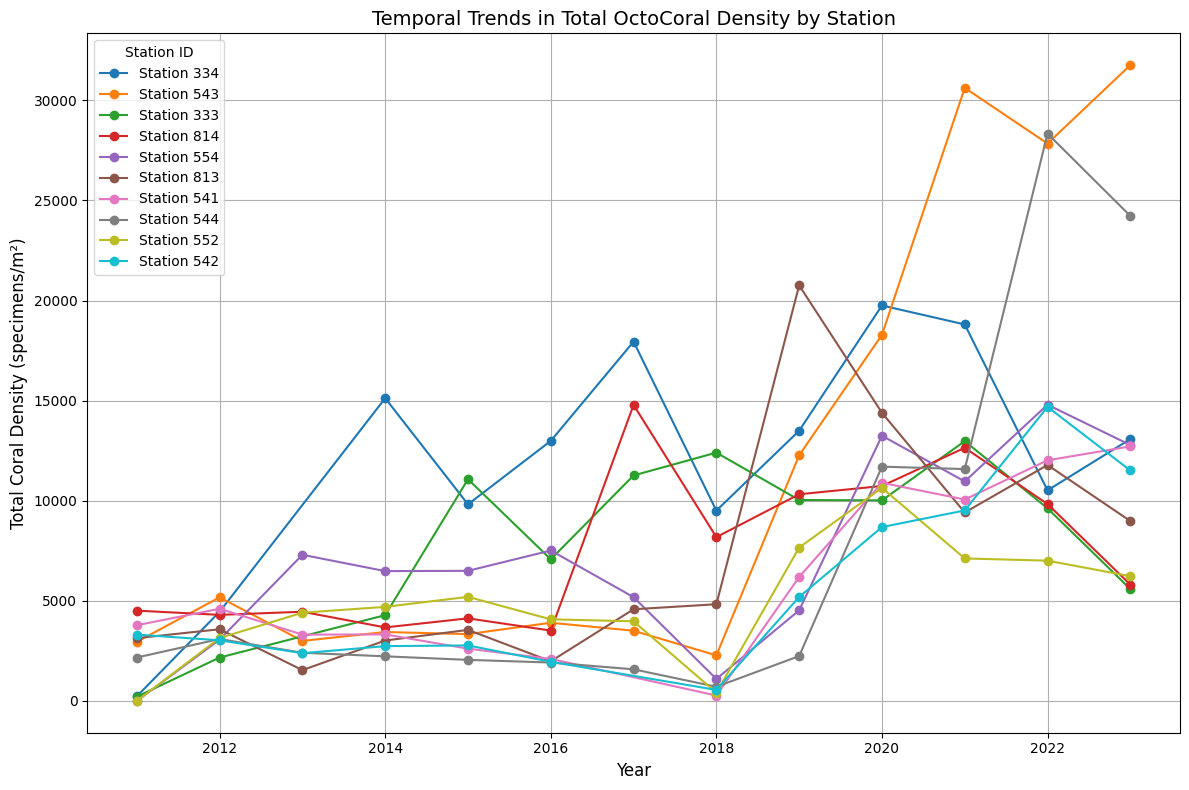

In [ ]:
def analyze_density_over_time(data, stations=None):
    """
    Analyze and visualize coral density trends over time.
    Parameters:
        data: DataFrame containing coral data
        stations: List of station IDs to include (None for all)
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:40]  # Limit to first 5 if not specified

    total_density_cols = ['OCTO_Density_Total_Octocorals']

    # Get total density per station and year
    density_summary = filtered_data.groupby(['Year', 'StationID'])[total_density_cols].sum().reset_index()

    # For species-specific analysis, sum the densities for each species by station and year
    # Creating a melted dataframe for easier plotting
    melted_density = pd.melt(
        density_summary,
        id_vars=['Year', 'StationID'],
        value_vars=total_density_cols,
        var_name='Species',
        value_name='Density'
    )

    # Remove the prefix from species names
    melted_density['Species'] = melted_density['Species'].str.replace('SCOR_Density_', '')

    # Create total density plot
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = melted_density[melted_density['StationID'] == station]
        station_total = station_data.groupby('Year')['Density'].sum().reset_index()
        ax.plot(station_total['Year'], station_total['Density'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Coral Density (specimens/m²)', fontsize=12)
    ax.set_title('Temporal Trends in Total OctoCoral Density by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig('density_trends_over_time.png', dpi=300)
    plt.show()

    # Create interactive species density plot for a selected station
    if stations:
        selected_station = stations[0]
        station_species_data = melted_density[melted_density['StationID'] == selected_station]

        # Get the top 10 species by density
        top_species = station_species_data.groupby('Species')['Density'].sum().nlargest(10).index
        station_species_data = station_species_data[station_species_data['Species'].isin(top_species)]

        fig = px.line(
            station_species_data,
            x='Year',
            y='Density',
            color='Species',
            title=f'Density Trends for Top 10 Species at Station {selected_station}',
            labels={'Density': 'Coral Density (specimens/m²)', 'Year': 'Year'},
            line_shape='linear',
            markers=True
        )

        fig.update_layout(
            legend_title_text='Species',
            xaxis_title='Year',
            yaxis_title='Density (specimens/m²)',
            template='plotly_white'
        )

        # Save as HTML for interactive viewing
        fig.write_html(f'density_trends_station_{selected_station}.html')
        fig.show()

    return melted_density

# Execute density analysis for stations 18 and a few others for comparison
density_data = analyze_density_over_time(merged, list(merged['StationID'].value_counts().head(10).index))


In [ ]:
(merged['StationID'].value_counts().head(20).index)

Index([343, 341, 354, 383, 342, 381, 363, 384, 382, 262, 362, 261, 353, 242,
       361, 264, 301, 364, 373, 243],
      dtype='int64', name='StationID')

### analyze_species_composition

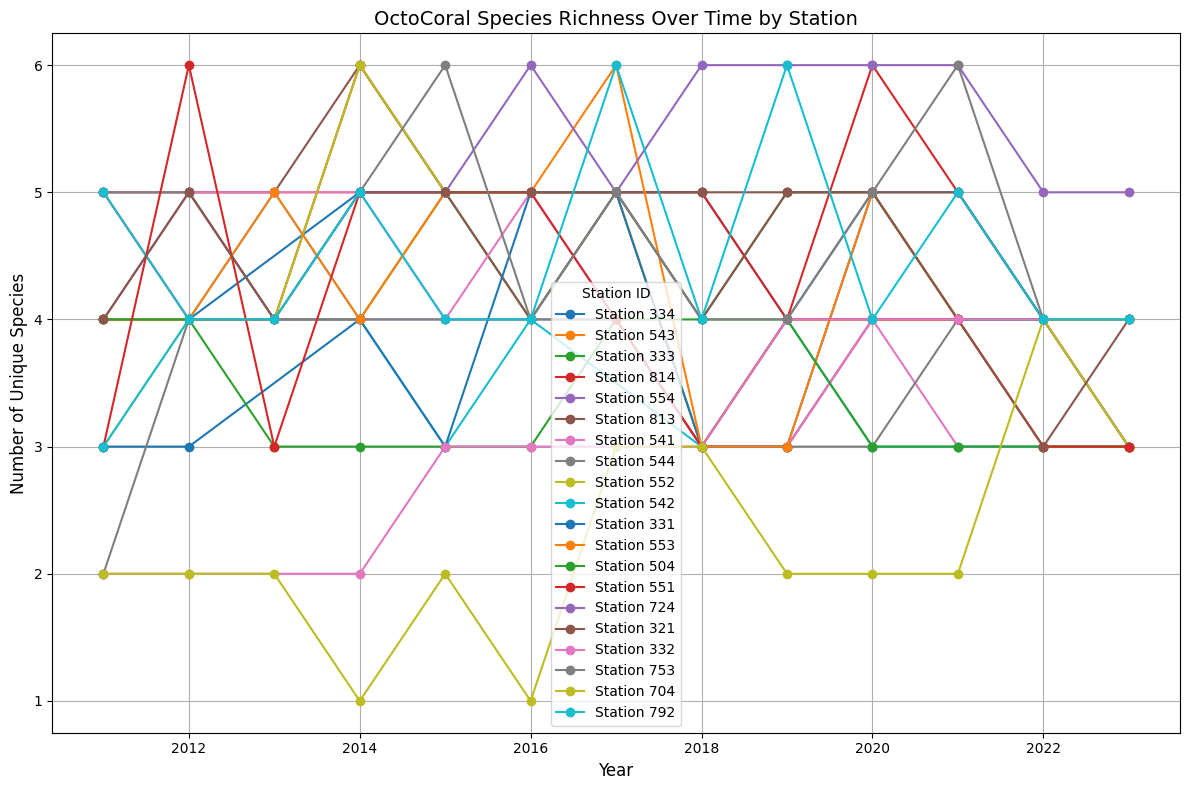

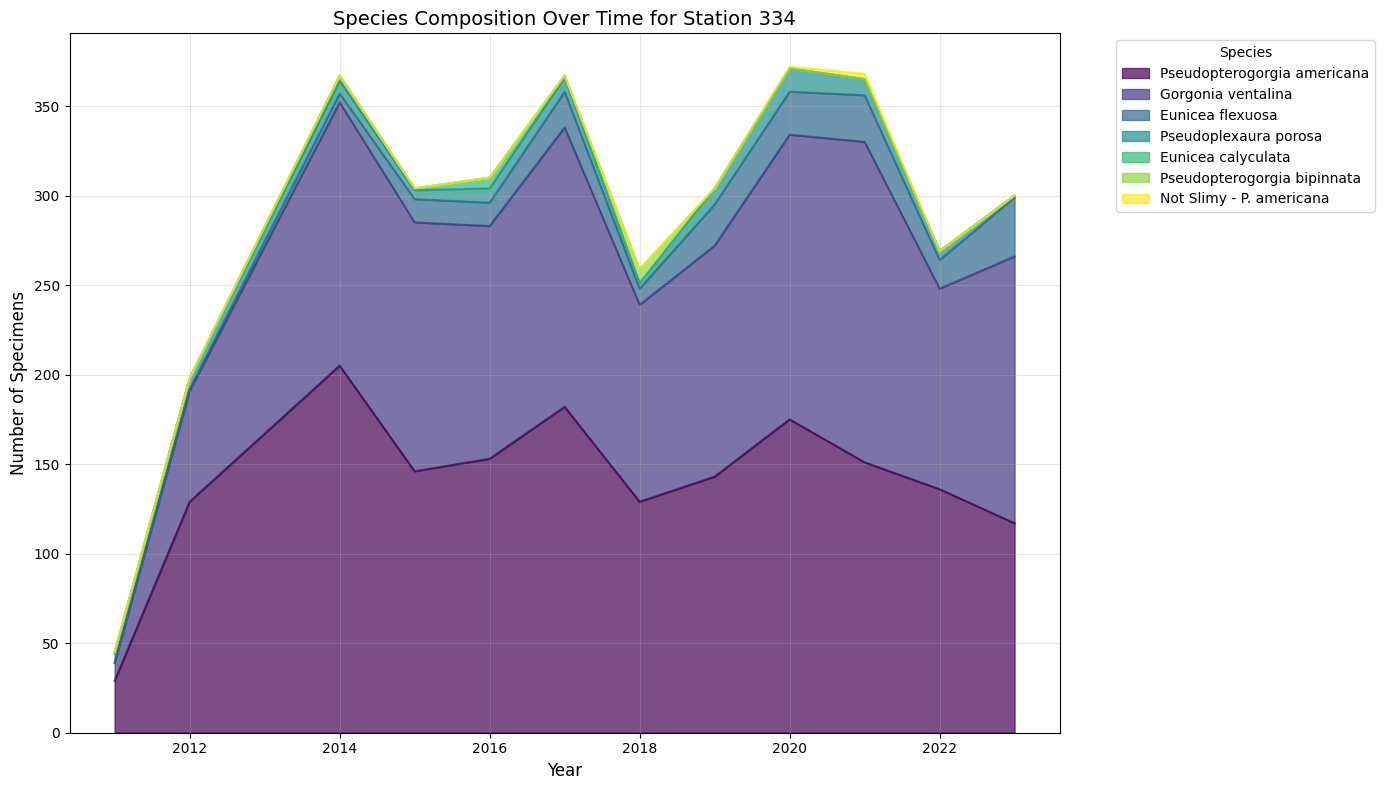

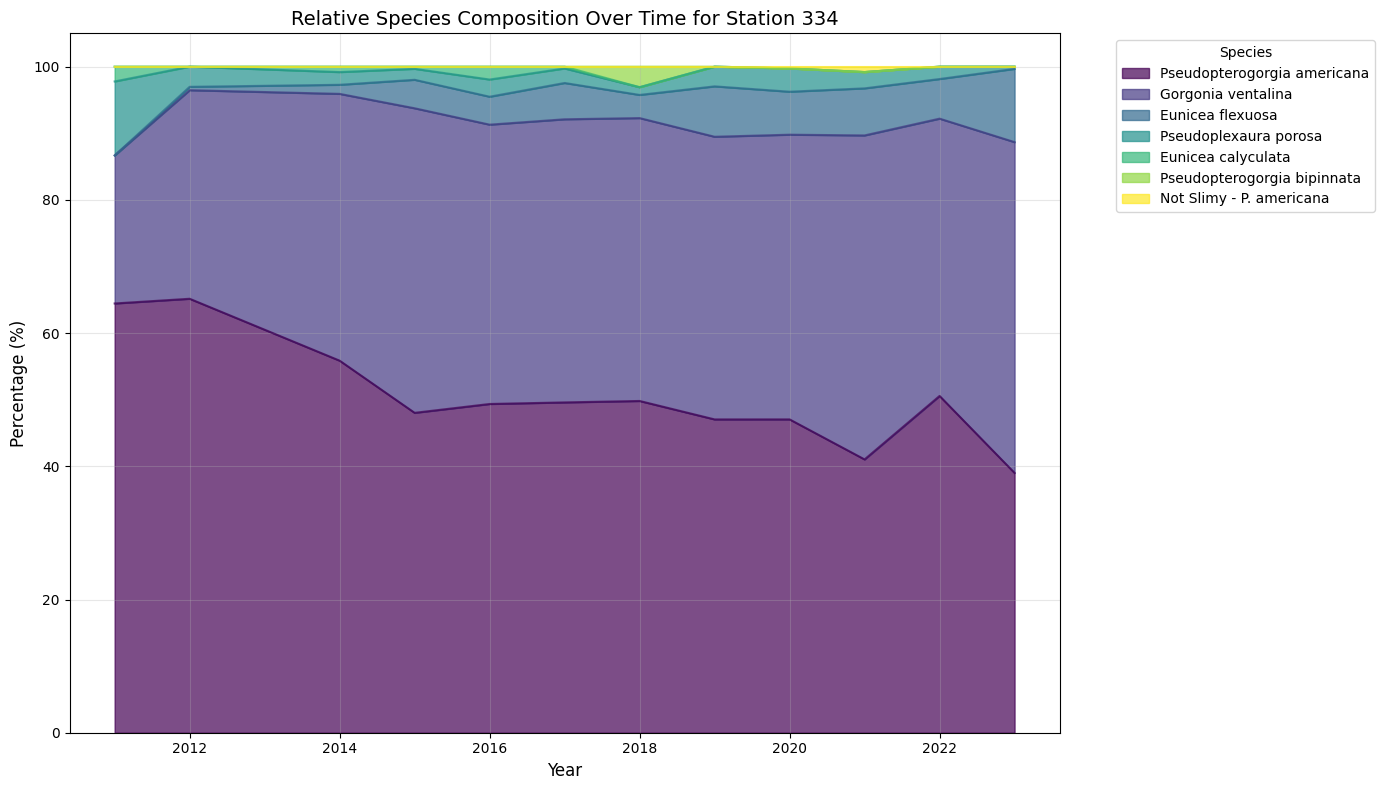

In [ ]:
def analyze_species_composition(data, stations):
    """
    Analyze and visualize changes in species composition over time.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:5]

    # Group by year and station to get species counts
    species_data = filtered_data.groupby(['Year', 'StationID']).agg({
        'OCTO_RawData_sciName': lambda x: x.nunique(),
        # 'OCTO_RawData_SPP_CODE': 'count'
    }).reset_index()

    species_data.columns = ['Year', 'StationID', 'UniqueSpecies', ]

    # Create a plot for species richness over time
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = species_data[species_data['StationID'] == station]
        ax.plot(station_data['Year'], station_data['UniqueSpecies'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Unique Species', fontsize=12)
    ax.set_title('OctoCoral Species Richness Over Time by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig('species_richness_over_time.png', dpi=300)
    plt.show()

    # Create stacked area charts for species composition
    # For this, we need detailed species counts by year and station
    for station in stations[:1]:  # Just do the first station as an example
        station_filtered = filtered_data[filtered_data['StationID'] == station]

        # Get counts of each species by year
        species_counts = station_filtered.groupby(['Year', 'OCTO_RawData_sciName']).size().reset_index(name='Count')

        # Pivot to get species as columns
        species_pivot = species_counts.pivot(index='Year', columns='OCTO_RawData_sciName', values='Count').fillna(0)

        # Get the top 10 species
        top_species = species_pivot.sum().nlargest(10).index
        species_pivot_top = species_pivot[top_species]

        # Create a stacked area chart
        plt.figure(figsize=(14, 8))
        species_pivot_top.plot.area(stacked=True, ax=plt.gca(), alpha=0.7, colormap='viridis')

        plt.title(f'Species Composition Over Time for Station {station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Specimens', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        # plt.savefig(f'species_composition_station_{station}.png', dpi=300)
        plt.show()

        # Create a relative (percentage) stacked area chart
        species_pivot_top_percent = species_pivot_top.div(species_pivot_top.sum(axis=1), axis=0) * 100

        plt.figure(figsize=(14, 8))
        species_pivot_top_percent.plot.area(stacked=True, ax=plt.gca(), alpha=0.7, colormap='viridis')

        plt.title(f'Relative Species Composition Over Time for Station {station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        # plt.savefig(f'relative_species_composition_station_{station}.png', dpi=300)
        plt.show()

    return species_data

# Execute species composition analysis
species_analysis = analyze_species_composition(merged, list(merged['StationID'].value_counts().head(20).index))


### analyze_percent_cover

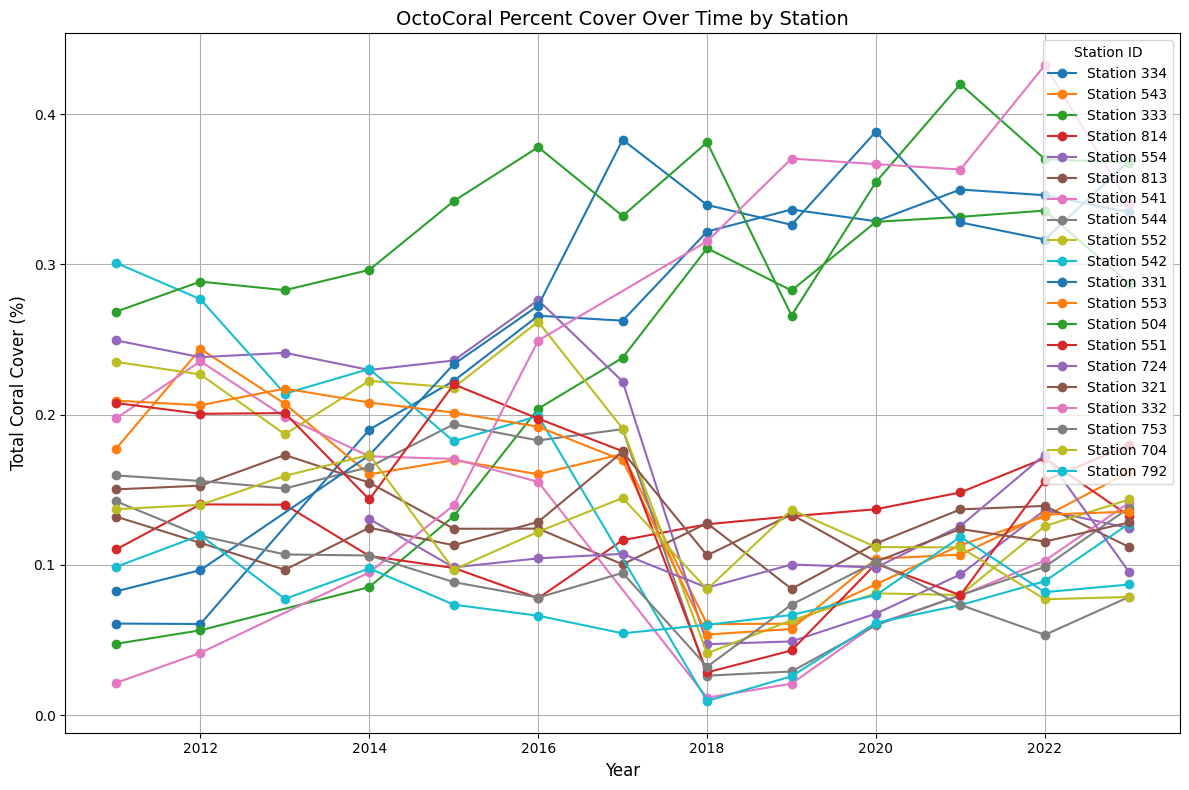

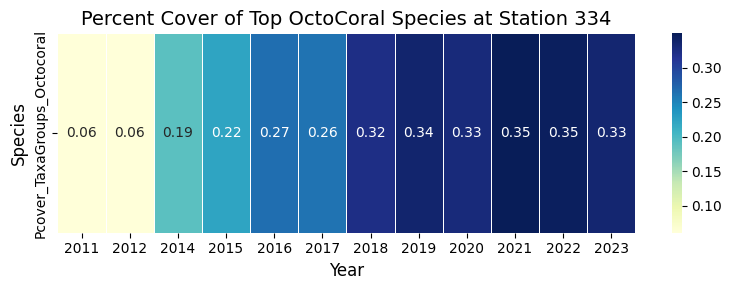

In [ ]:
def analyze_percent_cover(data, stations=None):
    """
    Analyze and visualize changes in percent cover over time.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:5]

    # For percent cover, we need to properly aggregate by year and station
    cover_cols = ['Pcover_TaxaGroups_Octocoral']
    cover_summary = filtered_data.groupby(['Year', 'StationID'])[cover_cols].mean().reset_index()

    # Calculate total percent cover (sum of all species)
    # First, identify columns that represent individual species cover
    species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]
    cover_summary['TotalCover'] = cover_summary[species_cover_cols].sum(axis=1)

    # Create a plot for total percent cover over time
    fig, ax = plt.subplots(figsize=(12, 8))

    for station in stations:
        station_data = cover_summary[cover_summary['StationID'] == station]
        ax.plot(station_data['Year'], station_data['TotalCover'], marker='o', label=f'Station {station}')

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Coral Cover (%)', fontsize=12)
    ax.set_title('OctoCoral Percent Cover Over Time by Station', fontsize=14)
    ax.legend(title='Station ID')
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig('percent_cover_over_time.png', dpi=300)
    plt.show()

    # Create a heatmap for species cover at one station
    if stations:
        selected_station = stations[0]
        station_cover = cover_summary[cover_summary['StationID'] == selected_station]

        # Select top species by average cover
        top_cover_species = station_cover[species_cover_cols].mean().nlargest(15).index

        # Melt the dataframe for easier plotting
        melted_cover = pd.melt(
            station_cover,
            id_vars=['Year'],
            value_vars=top_cover_species,
            var_name='Species',
            value_name='PercentCover'
        )

        # Clean species names
        melted_cover['Species'] = melted_cover['Species'].str.replace('Pcover_StonyCoralSpecies_', '')

        # Create a pivot table for the heatmap
        cover_pivot = melted_cover.pivot(index='Species', columns='Year', values='PercentCover')

        plt.figure(figsize=(8, 3))
        sns.heatmap(cover_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
        plt.title(f'Percent Cover of Top OctoCoral Species at Station {selected_station}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Species', fontsize=12)
        plt.tight_layout()
        # plt.savefig(f'species_cover_heatmap_station_{selected_station}.png', dpi=300)
        plt.show()

    return cover_summary

# Execute percent cover analysis
cover_analysis = analyze_percent_cover(merged, list(merged['StationID'].value_counts().head(20).index))


### perform_multivariate_analysis

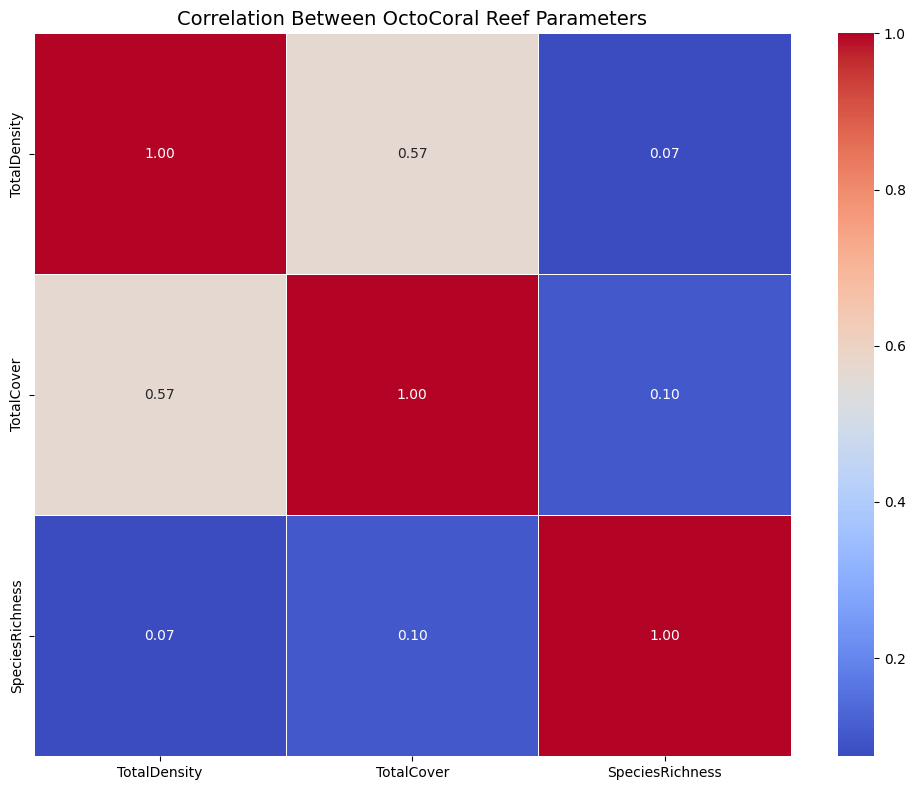

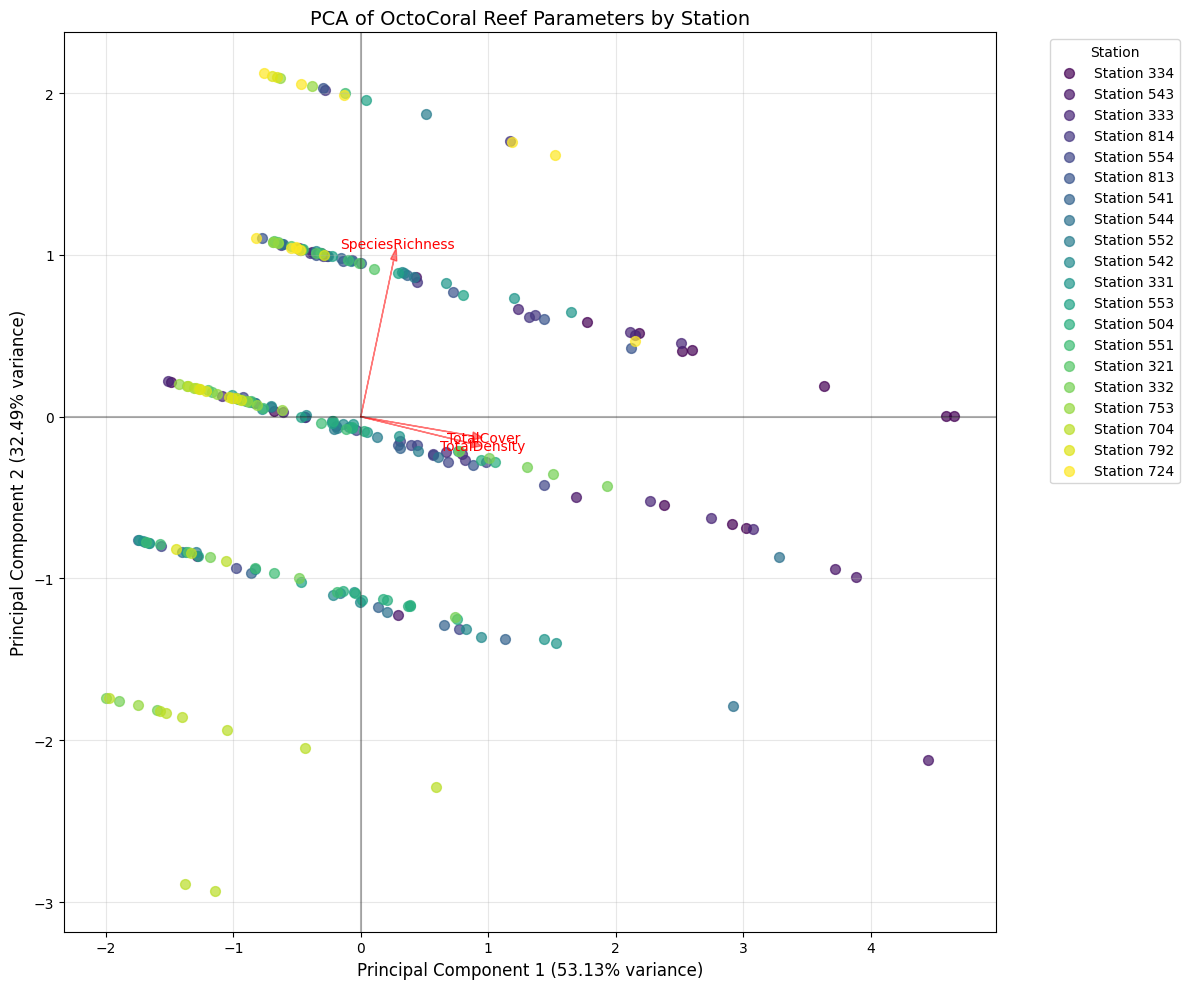

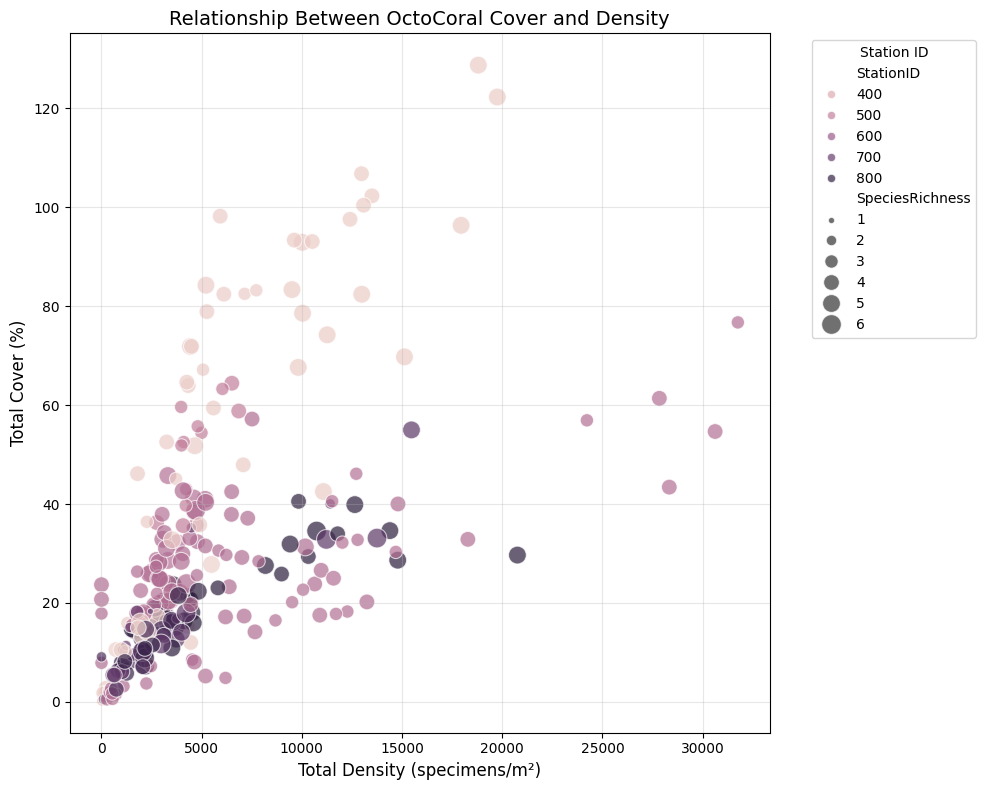

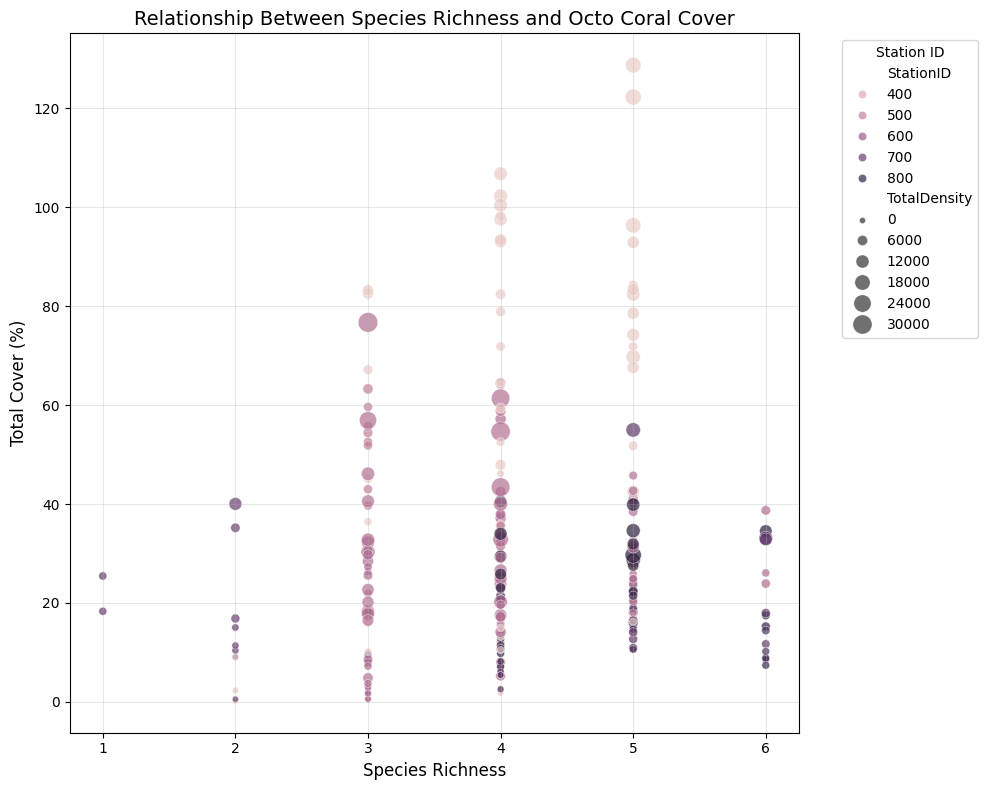

In [ ]:
def perform_multivariate_analysis(data, stations=None):
    """
    Perform multivariate analysis to identify relationships between parameters.
    """
    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:10]  # Limit to first 10 stations

    # Prepare a dataframe with aggregated metrics by station and year
    station_year_metrics = []

    for year in filtered_data['Year'].unique():
        year_data = filtered_data[filtered_data['Year'] == year]

        for station in stations:
            station_data = year_data[year_data['StationID'] == station]

            if len(station_data) == 0:
                continue

            # Calculate key metrics
            metrics = {
                'Year': year,
                'StationID': station
            }
            Total_density_cols = ['OCTO_Density_Total_Octocorals']
            cover_cols = ['Pcover_TaxaGroups_Octocoral']

            # Density metrics
            total_density = station_data[Total_density_cols].sum().sum()
            metrics['TotalDensity'] = total_density

            # Cover metrics
            species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]
            total_cover = station_data[species_cover_cols].sum().sum()
            metrics['TotalCover'] = total_cover

            # Species metrics
            species_richness = station_data['OCTO_RawData_sciName'].nunique() if 'OCTO_RawData_sciName' in station_data.columns else 0
            metrics['SpeciesRichness'] = species_richness

            # LTA metrics
            # total_lta = station_data[LTA_cols].sum().sum()
            # metrics['TotalLTA'] = total_lta

            # Condition metrics (if available)
            if len(condition_counts_cols) > 0:
                condition_metrics = station_data[condition_counts_cols].sum().sum()
                metrics['ConditionCounts'] = condition_metrics

            station_year_metrics.append(metrics)

    metrics_df = pd.DataFrame(station_year_metrics)

    # 1. Correlation Analysis
    if len(metrics_df) > 0:
        numeric_cols = ['TotalDensity', 'TotalCover', 'SpeciesRichness']
        if 'ConditionCounts' in metrics_df.columns:
            numeric_cols.append('ConditionCounts')

        plt.figure(figsize=(10, 8))
        correlation_matrix = metrics_df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Between OctoCoral Reef Parameters', fontsize=14)
        plt.tight_layout()
        # plt.savefig('parameter_correlation.png', dpi=300)
        plt.show()

    # 2. PCA Analysis for station comparison
    if len(metrics_df) > 5:  # Need enough data points for meaningful PCA
        # Prepare data for PCA
        pca_data = metrics_df[numeric_cols].copy()

        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data)

        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)

        # Create a dataframe with the principal components
        pca_df = pd.DataFrame(
            data=principal_components,
            columns=['PC1', 'PC2']
        )

        # Add metadata
        pca_df['StationID'] = metrics_df['StationID']
        pca_df['Year'] = metrics_df['Year']

        # Create PCA plot
        plt.figure(figsize=(12, 10))

        # Color by station
        stations_unique = pca_df['StationID'].unique()
        colors = plt.cm.viridis(np.linspace(0, 1, len(stations_unique)))

        for i, station in enumerate(stations_unique):
            station_pca = pca_df[pca_df['StationID'] == station]
            plt.scatter(
                station_pca['PC1'],
                station_pca['PC2'],
                c=[colors[i]],
                label=f'Station {station}',
                alpha=0.7,
                s=50
            )

        # Add arrows for feature loadings
        feature_names = numeric_cols
        loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

        for i, feature in enumerate(feature_names):
            plt.arrow(
                0, 0,
                loadings[i, 0],
                loadings[i, 1],
                color='red',
                alpha=0.5,
                head_width=0.05
            )
            plt.text(
                loadings[i, 0] * 1.1,
                loadings[i, 1] * 1.1,
                feature,
                color='red',
                ha='center',
                va='center'
            )

        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
        plt.title('PCA of OctoCoral Reef Parameters by Station', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        # plt.savefig('pca_analysis.png', dpi=300)
        plt.show()

    # 3. Create scatter plots to explore relationships
    if len(metrics_df) > 0:
        # Cover vs. Density
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            data=metrics_df,
            x='TotalDensity',
            y='TotalCover',
            hue='StationID',
            size='SpeciesRichness',
            sizes=(20, 200),
            alpha=0.7
        )
        plt.title('Relationship Between OctoCoral Cover and Density', fontsize=14)
        plt.xlabel('Total Density (specimens/m²)', fontsize=12)
        plt.ylabel('Total Cover (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        # plt.savefig('cover_vs_density.png', dpi=300)
        plt.show()

        # Richness vs. Cover
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            data=metrics_df,
            x='SpeciesRichness',
            y='TotalCover',
            hue='StationID',
            size='TotalDensity',
            sizes=(20, 200),
            alpha=0.7
        )
        plt.title('Relationship Between Species Richness and Octo Coral Cover', fontsize=14)
        plt.xlabel('Species Richness', fontsize=12)
        plt.ylabel('Total Cover (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        # plt.savefig('richness_vs_cover.png', dpi=300)
        plt.show()

    return metrics_df
# condition_counts_cols.remove('OCTO_ConditionCounts_sciName')

# Execute multivariate analysis
multivariate_results = perform_multivariate_analysis(merged, list(merged['StationID'].value_counts().head(20).index))


### analyze_trends_and_forecast

Station 343 ADF Statistic: -3.7136339933173366
Station 343 p-value: 0.003925416022135777


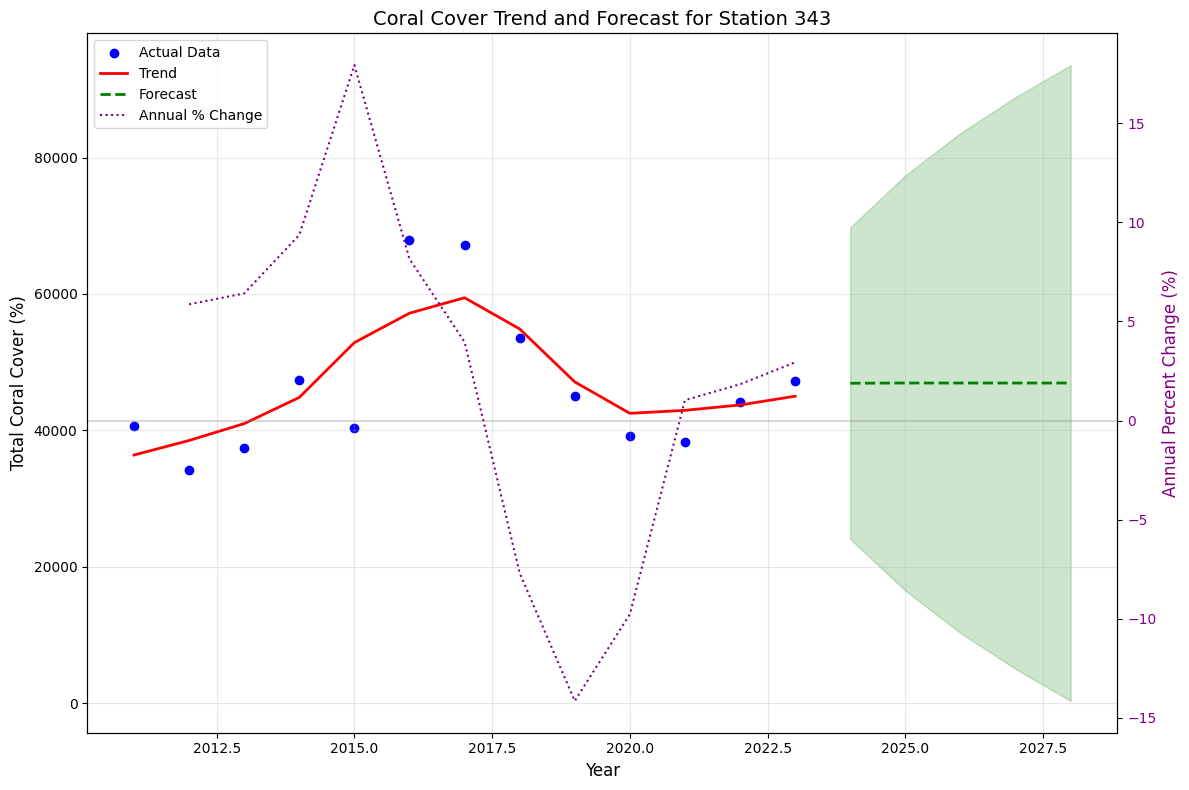

Station 341 ADF Statistic: -1.3098085433629378
Station 341 p-value: 0.624673031299805


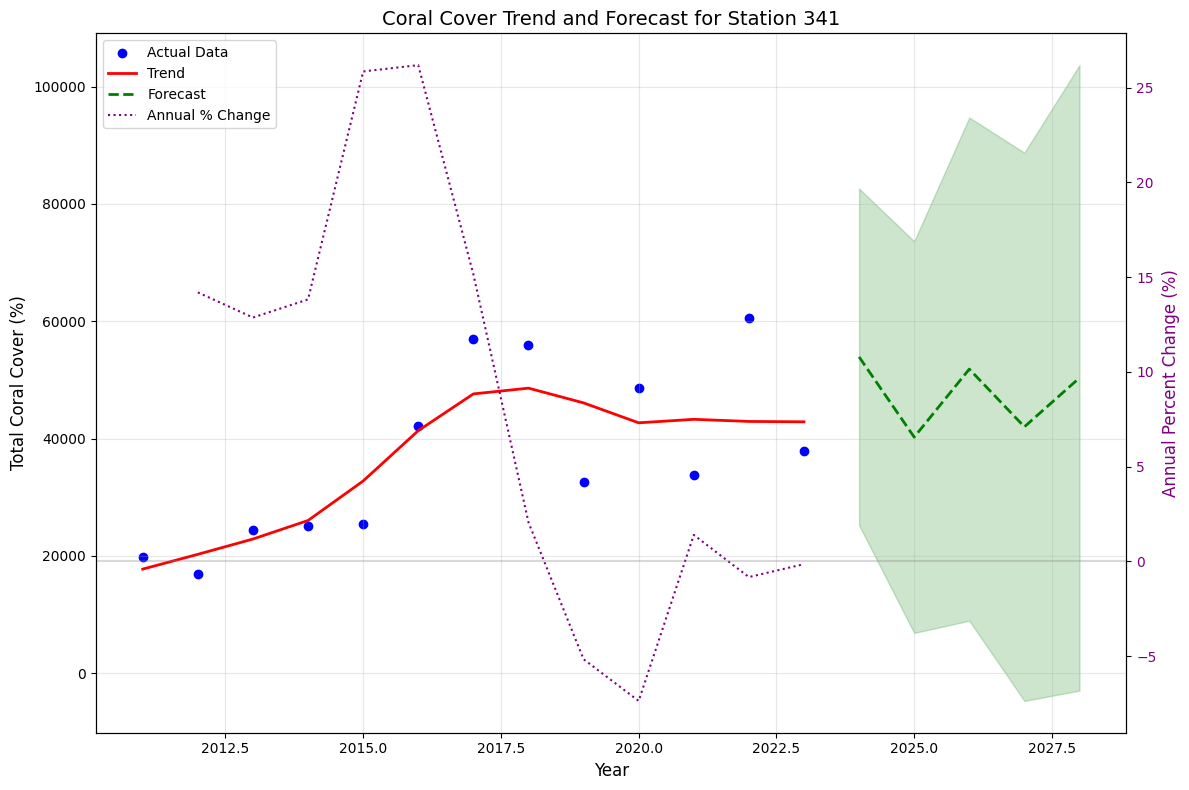

Station 354 ADF Statistic: -2.768963722638142
Station 354 p-value: 0.06284566057802436


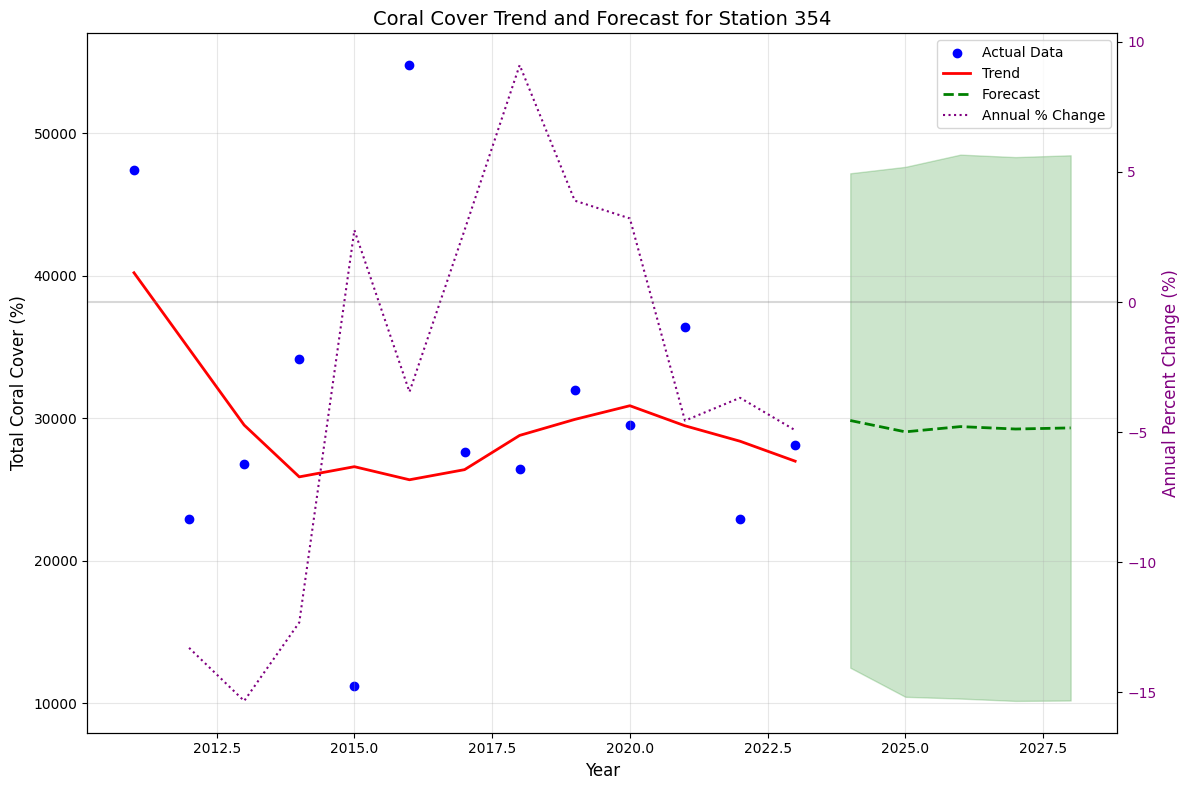

Station 383 ADF Statistic: -3.0811112410522488
Station 383 p-value: 0.0279829892848316


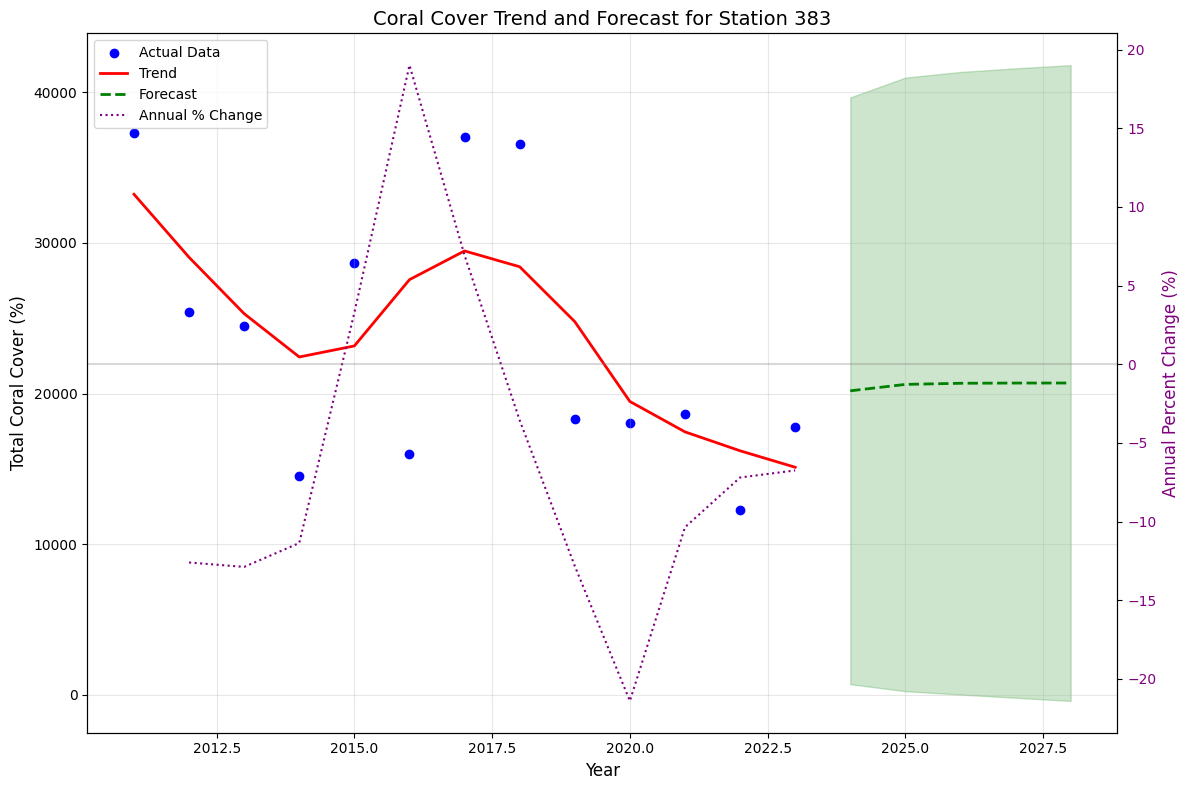

Station 342 ADF Statistic: -2.316998489904284
Station 342 p-value: 0.16654421383094953


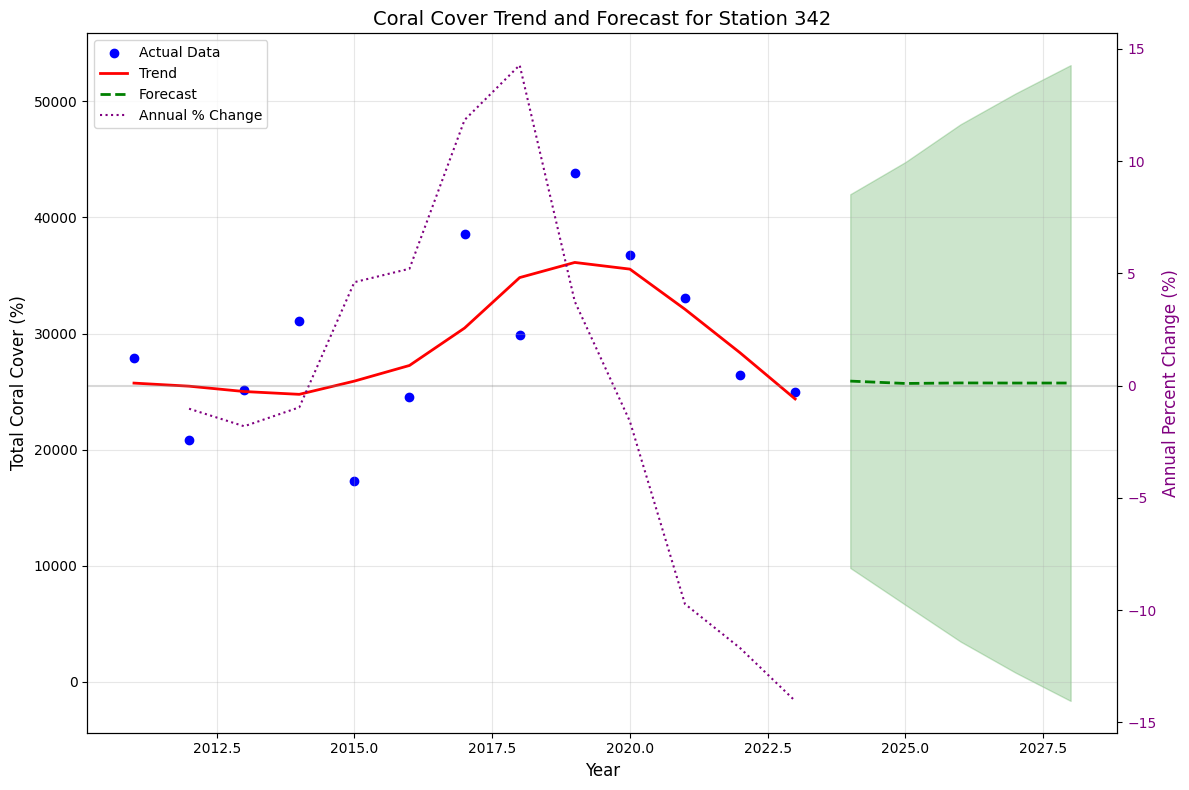

In [ ]:
def analyze_trends_and_forecast(data, stations=None, forecast_years=5):
    """
    Analyze trends and forecast future conditions for coral reefs.
    """
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.nonparametric.smoothers_lowess import lowess

    if stations:
        filtered_data = data[data['StationID'].isin(stations)]
    else:
        filtered_data = data
        stations = filtered_data['StationID'].unique()[:3]  # Limit to first 3 stations

    # Prepare time series data for total cover
    species_cover_cols = [col for col in cover_cols if not col.endswith('points') and not col.endswith('all_years')]

    for station in stations:
        station_data = filtered_data[filtered_data['StationID'] == station]

        # Group by year and calculate total cover
        yearly_cover = station_data.groupby('Year')[species_cover_cols].sum().sum(axis=1).reset_index()
        yearly_cover.columns = ['Year', 'TotalCover']

        if len(yearly_cover) < 5:  # Need enough data points for meaningful analysis
            print(f"Not enough data points for Station {station}")
            continue

        # Check for stationarity
        adf_result = adfuller(yearly_cover['TotalCover'].dropna())
        print(f"Station {station} ADF Statistic: {adf_result[0]}")
        print(f"Station {station} p-value: {adf_result[1]}")

        # Apply LOWESS smoothing for trend analysis
        filtered = lowess(
            yearly_cover['TotalCover'],
            yearly_cover['Year'],
            is_sorted=True,
            frac=0.6,
            it=3
        )

        trend = pd.DataFrame(filtered, columns=['Year', 'Trend'])

        # Calculate annual percent change
        trend['PercentChange'] = trend['Trend'].pct_change() * 100

        # Create visualization
        fig, ax1 = plt.subplots(figsize=(12, 8))

        # Plot actual data and trend
        ax1.scatter(yearly_cover['Year'], yearly_cover['TotalCover'], color='blue', label='Actual Data')
        ax1.plot(trend['Year'], trend['Trend'], color='red', linewidth=2, label='Trend')

        # If we have enough data, attempt forecasting
        if len(yearly_cover) >= 5:
            try:
                # Fit ARIMA model
                model = ARIMA(yearly_cover['TotalCover'], order=(1,1,1))
                model_fit = model.fit()

                # Forecast
                last_year = yearly_cover['Year'].max()
                forecast_years_range = range(last_year + 1, last_year + forecast_years + 1)
                forecast = model_fit.forecast(steps=forecast_years)

                # Plot forecast
                ax1.plot(
                    forecast_years_range,
                    forecast,
                    color='green',
                    linestyle='--',
                    linewidth=2,
                    label='Forecast'
                )

                # Add forecast confidence interval
                forecast_ci = model_fit.get_forecast(steps=forecast_years).conf_int()
                ax1.fill_between(
                    forecast_years_range,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1],
                    color='green',
                    alpha=0.2
                )
            except:
                print(f"Forecasting failed for Station {station}")

        ax1.set_xlabel('Year', fontsize=12)
        ax1.set_ylabel('Total Coral Cover (%)', fontsize=12)
        ax1.set_title(f'Coral Cover Trend and Forecast for Station {station}', fontsize=14)
        ax1.grid(True, alpha=0.3)
        ax1.legend(loc='upper left')

        # Add a second y-axis for percent change
        ax2 = ax1.twinx()
        ax2.plot(
            trend['Year'][1:],
            trend['PercentChange'][1:],
            color='purple',
            linestyle=':',
            linewidth=1.5,
            label='Annual % Change'
        )
        ax2.set_ylabel('Annual Percent Change (%)', fontsize=12, color='purple')
        ax2.tick_params(axis='y', labelcolor='purple')

        # Add horizontal line at 0% change
        ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

        # Add legend for second y-axis
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='best')

        plt.tight_layout()
        plt.savefig(f'trend_forecast_station_{station}.png', dpi=300)
        plt.show()

    return None

# Execute trend analysis and forecasting
analyze_trends_and_forecast(merged, stations=list(merged['StationID'].value_counts().head(5).index))
